# Plotting Capacity and Generation Values across Scenarios # 

Import the required libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import datetime
import tabulate
from IPython.display import HTML, display, Markdown
import csv
import unicodedata
import getopt
from matplotlib.ticker import MaxNLocator
import networkx as nx
import geopandas as gpd
from matplotlib import cm
from shapely.geometry import Point, Polygon
import shapely.ops
import shapely.geometry
from pathlib import Path
#import adjustText as aT

Specifying the path which has all the data 

In [7]:
os.chdir("/Users/lesarmstrong/Documents/GitHub/DOLPHYN_May2023_SuperCloud/Example_Systems/PJM_with_MI")
directory = Path.cwd()

In [8]:
scenarios = ['PJM_with_MI_no_caverns_0_red', 'PJM_with_MI_no_caverns_70_red', 'PJM_with_MI_no_caverns_85_red',
             'PJM_with_MI_no_caverns_90_red', 'PJM_with_MI_no_caverns_95_red', 'PJM_with_MI_no_caverns_99_red', 
             'PJM_with_MI_no_caverns_100_red']

scenario_labels = [  'No Emission Cap\n without Salt Caverns',
                     '70% Emission Reduction Cap\n without Salt Caverns',
                     '85% Emission Reduction Cap\n without Salt Caverns',
                    '90% Emission Reduction Cap\n without Salt Caverns',
                     '95% Emission Reduction Cap\n without Salt Caverns',
                     '99% Emission Reduction Cap\n without Salt Caverns',
                     '100% Emission Reduction Cap\n without Salt Caverns'
                                  ]

rename_dict= {
    'PJM_with_MI_no_caverns_0_red': 'No Emission Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_70_red': '70% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_85_red': '85% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_90_red': '90% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_95_red': '95% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_99_red': '99% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_no_caverns_100_red': '100% Emission Reduction Cap\n without Salt Caverns',
    'PJM_with_MI_with_caverns_0_red': 'No Emission Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_70_red': '70% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_85_red': '85% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_90_red': '90% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_95_red': '95% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_99_red': '99% Emission Reduction Cap\n with Salt Caverns',
    'PJM_with_MI_with_caverns_100_red': '100% Emission Reduction Cap\n with Salt Caverns'
}
#scenarios = ['BaseCase', 'More_Nuclear', 'More_VRE']
#scenario_labels = ['BaseCase', 'More_Nuclear', 'More_VRE']

In [4]:
#scenarios = ['NoCap', 'NoCap_VRELimit', '25pRed', '25pRed_VRELimit', '50pRed', '50pRed_VRELimit', '70pRed', '70pRed_VRELimit', '80pRed', '80pRed_VRELimit', '90pRed', '90pRed_VRELimit', '95pRed', '95pRed_VRELimit', '99pRed', '99pRed_VRELimit']
#scenario_labels = ['NoCap', 'NoCap_VRELimit', '25pRed', '25pRed_VRELimit', '50pRed', '50pRed_VRELimit', '70pRed', '70pRed_VRELimit', '80pRed', '80pRed_VRELimit', '90pRed', '90pRed_VRELimit', '95pRed', '95pRed_VRELimit', '99pRed', '99pRed_VRELimit']
#total_emissions = pd.DataFrame(columns=scenario_labels)

Visualizing Power System Capacity 

In [10]:
# by scenario
total_cap = pd.DataFrame(columns = scenario_labels)

resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'battery', 'solar|pv','landbasedwind|onshore_wind', 'offshorewind']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Existing Coal', 'Battery', 'Solar','Onshore Wind', 'Offshore Wind']
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind', 'Battery']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine', 'sienna']

for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'Results/capacity.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]][locals()[scenarios[i]].columns[[0,5]]]
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['Resource'].str.contains(resource_abr[x]), 'Resource'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Resource'])['EndCap'].sum()
    total_cap[scenario_labels[i]] = locals()[scenarios[i]]

total_cap = total_cap.T
total_cap = total_cap[resource_order]/1000
total_cap.plot(kind='bar', stacked=True, color = color, figsize = (14,10))
plt.title('Capacity by Scenario and Resource', fontsize = 22)
plt.ylabel('Capacity (GW)',fontsize = 22)
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.ylim(0,300)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lesarmstrong/Documents/GitHub/DOLPHYN_May2023_SuperCloud/Example_Systems/PJM_with_MI/PJM_with_MI_no_caverns_0_red/Results/capacity.csv'

In [6]:
total_cap

Resource,Hydro,Existing Nuclear,New Nuclear,Existing Natural Gas,New Natural Gas,Natural Gas CCS,Existing Coal,Solar,Onshore Wind,Offshore Wind,Battery
NoCap,9.062094,27.140528,0.001061,94.726243,15.630415,0.001852,18.232758,64.562877,77.835024,0.000057,19.059453
25pRed,9.062094,29.312465,0.000604,94.726047,8.025864,0.001176,18.232448,70.762322,95.085788,0.000043,17.827264
50pRed,9.062094,29.312686,0.000484,94.726387,4.199680,0.000817,15.094553,79.328471,117.921640,0.000022,19.511944
70pRed,9.062094,29.312637,0.000668,94.725742,1.652263,0.001080,1.915066,101.895828,141.993000,0.000038,26.679383
80pRed,9.062094,29.312661,0.000461,94.725940,0.003528,0.000781,0.006204,111.962661,159.843655,0.000028,27.176565
90pRed,9.062094,29.311930,0.020484,88.959076,0.039505,0.126765,0.030386,138.849222,184.480063,0.000738,30.523367
95pRed,9.062094,29.312684,0.000590,62.133644,0.000866,16.834967,0.000845,142.791351,185.590909,0.000024,38.171298
99pRed,9.062094,29.312690,0.001029,40.104487,0.000986,18.498030,0.001020,171.875562,197.687546,0.000026,45.963253


Plotting Power System Generation 

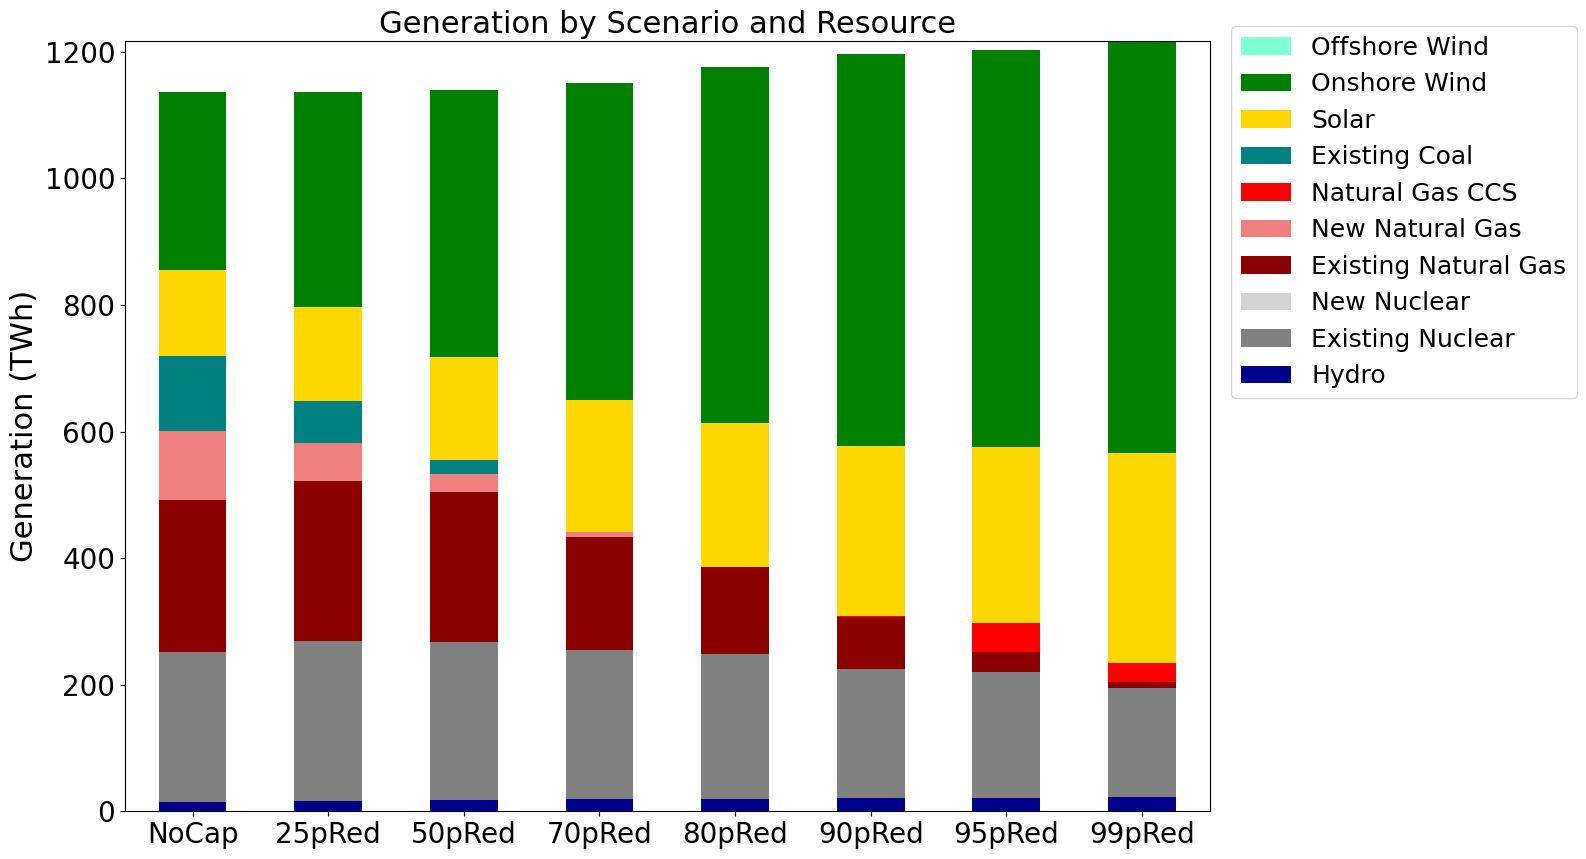

In [7]:
# by scenario
total_gen = pd.DataFrame(columns = scenario_labels)

resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'solar|pv','landbasedwind|onshore_wind', 'offshorewind']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind']
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine']


for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'power.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index','AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['index'])['AnnualSum'].sum()
    total_gen[scenario_labels[i]] = locals()[scenarios[i]]

total_gen = total_gen.T
total_gen = total_gen[resource_order]/1000000
total_gen.plot(kind='bar', stacked=True, color = color, figsize = (14,10))
plt.title('Generation by Scenario and Resource', fontsize = 22)
plt.ylabel('Generation (TWh)', fontsize = 22)
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.ylim(0,300)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)

## Hydrogen Power System Results ##

In [8]:
os.chdir("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_IES_Simulations/Consolidated_Results/HSC_Results/")
directory = Path.cwd()

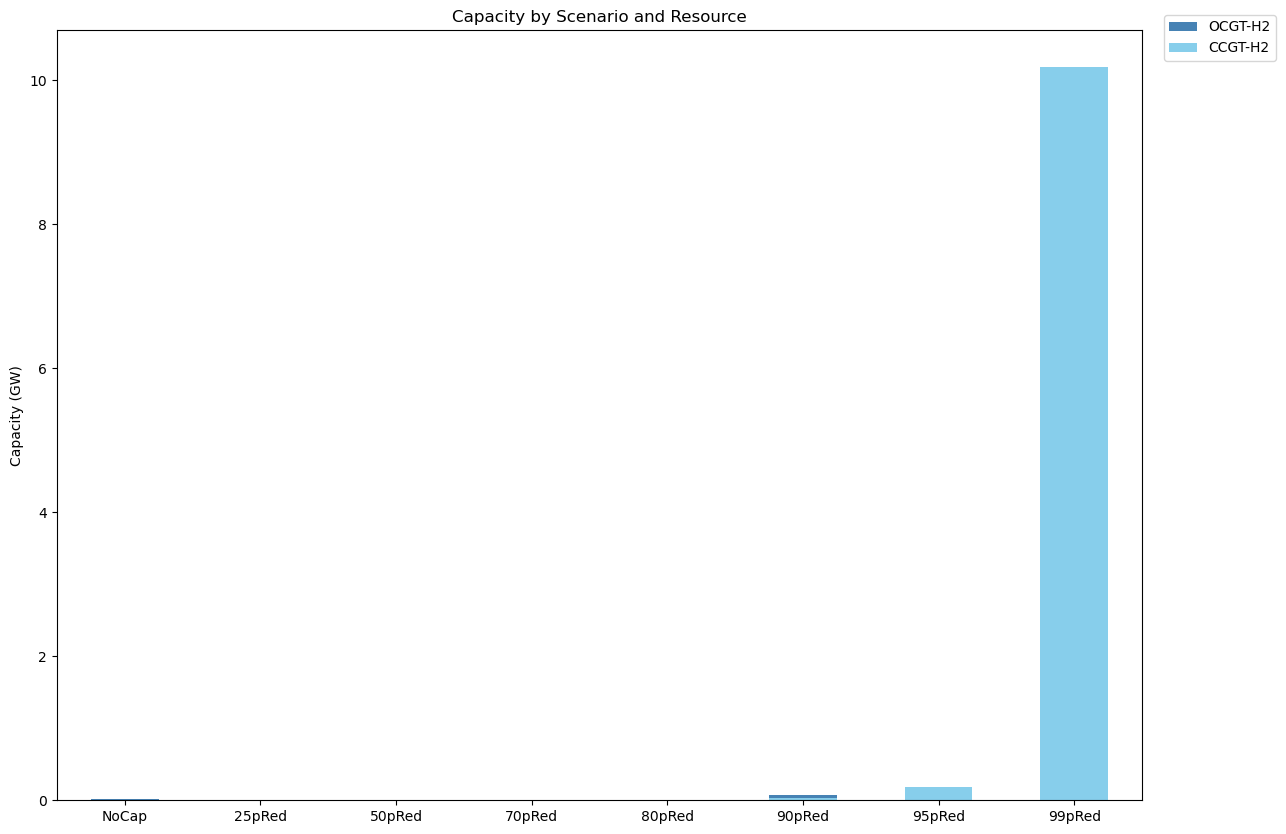

In [9]:
# by scenario
total_g2p_cap = pd.DataFrame(columns = scenario_labels)
#resource_abr = ['CCGT-H2', 'OCGT-H2', 'Fuel_Cell']
resource_abr = ['CCGT-H2', 'OCGT-H2']
#resource_name = ['CCGT-H2', 'OCGT-H2', 'Fuel Cell']
resource_name = ['CCGT-H2', 'OCGT-H2']
#resource_order = ['CCGT-H2', 'OCGT-H2', 'Fuel Cell']
resource_order = ['CCGT-H2', 'OCGT-H2']
#color = ['skyblue', 'steelblue', 'brown']
color = ['skyblue', 'steelblue']

for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'HSC_g2p_capacity.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]][locals()[scenarios[i]].columns[[0,5]]]
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['Resource'].str.contains(resource_abr[x]), 'Resource'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Resource'])['EndCap'].sum()
    total_g2p_cap[scenario_labels[i]] = locals()[scenarios[i]]

total_g2p_cap = total_g2p_cap.T
total_g2p_cap = total_g2p_cap[resource_order]/1000
total_g2p_cap.plot(kind='bar', stacked=True, color = color, figsize = (14,10))
plt.title('Capacity by Scenario and Resource')
plt.ylabel('Capacity (GW)')
plt.xticks(rotation = 0)
#plt.ylim(0,3.5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0)

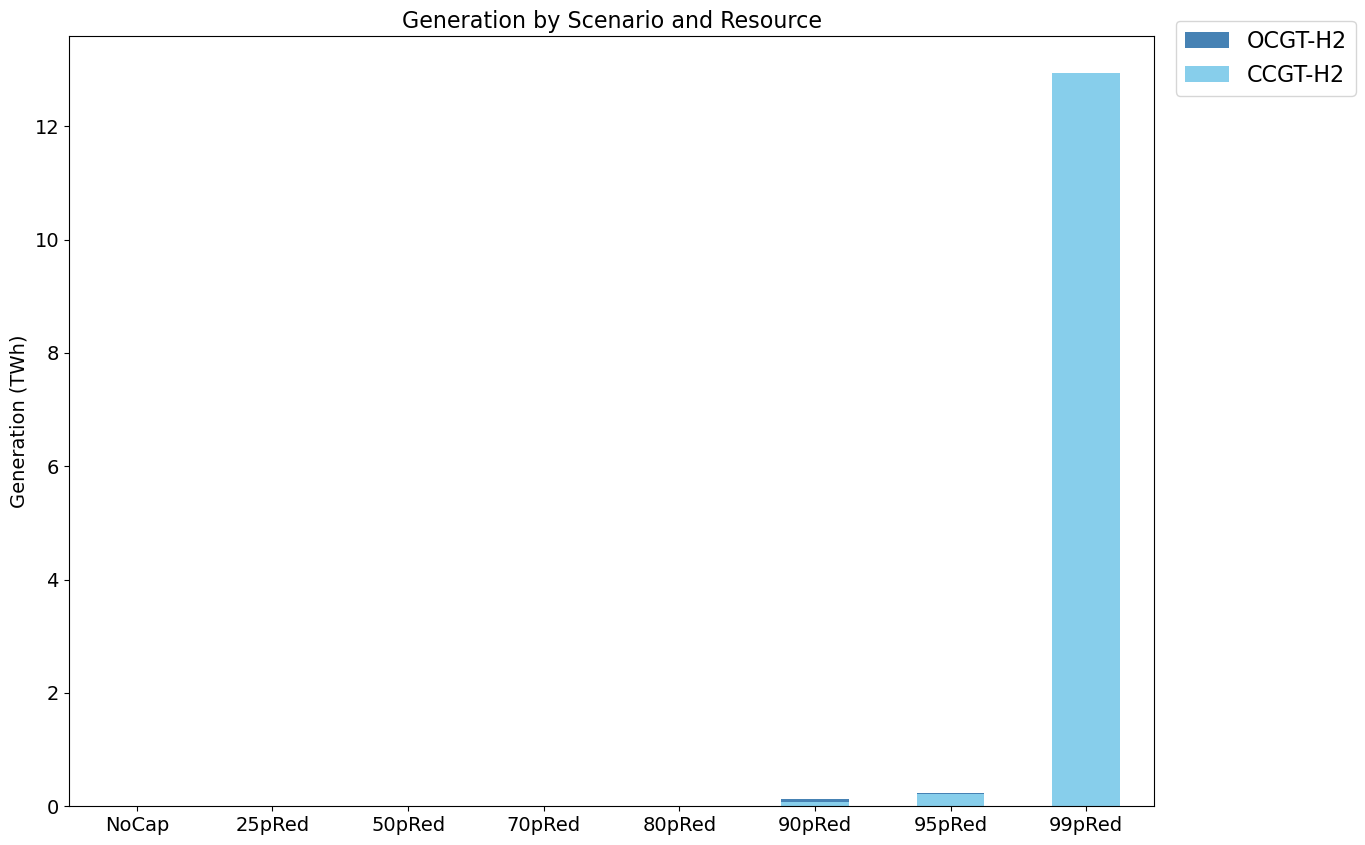

In [10]:
# by scenario
total_g2p_gen = pd.DataFrame(columns = scenario_labels)
#resource_abr = ['CCGT-H2', 'OCGT-H2', 'Fuel_Cell']
resource_abr = ['CCGT-H2', 'OCGT-H2']
#resource_name = ['CCGT-H2', 'OCGT-H2', 'Fuel Cell']
resource_name = ['CCGT-H2', 'OCGT-H2']
#resource_order = ['CCGT-H2', 'OCGT-H2', 'Fuel Cell']
resource_order = ['CCGT-H2', 'OCGT-H2']
#color = ['skyblue', 'steelblue', 'brown']
color = ['skyblue', 'steelblue']

for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'HSC_G2P_power_generation.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index','AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['index'])['AnnualSum'].sum()
    total_g2p_gen[scenario_labels[i]] = locals()[scenarios[i]]

total_g2p_gen = total_g2p_gen.T
total_g2p_gen = total_g2p_gen[resource_order]/1000000
total_g2p_gen.plot(kind='bar', stacked=True, color = color, figsize = (14,10))
plt.title('Generation by Scenario and Resource', fontsize = 16)
plt.ylabel('Generation (TWh)', fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)
#plt.ylim(0,350)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 16)

In [11]:
total_cap_ies = pd.concat([total_cap, total_g2p_cap], axis=1)

In [12]:
total_cap_ies

Resource,Hydro,Existing Nuclear,New Nuclear,Existing Natural Gas,New Natural Gas,Natural Gas CCS,Existing Coal,Solar,Onshore Wind,Offshore Wind,Battery,CCGT-H2,OCGT-H2
NoCap,9.062094,27.140528,0.001061,94.726243,15.630415,0.001852,18.232758,64.562877,77.835024,0.000057,19.059453,0.003511,0.020086
25pRed,9.062094,29.312465,0.000604,94.726047,8.025864,0.001176,18.232448,70.762322,95.085788,0.000043,17.827264,0.002106,0.005578
50pRed,9.062094,29.312686,0.000484,94.726387,4.199680,0.000817,15.094553,79.328471,117.921640,0.000022,19.511944,0.001146,0.001997
70pRed,9.062094,29.312637,0.000668,94.725742,1.652263,0.001080,1.915066,101.895828,141.993000,0.000038,26.679383,0.001183,0.002490
80pRed,9.062094,29.312661,0.000461,94.725940,0.003528,0.000781,0.006204,111.962661,159.843655,0.000028,27.176565,0.000705,0.001364
90pRed,9.062094,29.311930,0.020484,88.959076,0.039505,0.126765,0.030386,138.849222,184.480063,0.000738,30.523367,0.037533,0.038565
95pRed,9.062094,29.312684,0.000590,62.133644,0.000866,16.834967,0.000845,142.791351,185.590909,0.000024,38.171298,0.178460,0.004528
99pRed,9.062094,29.312690,0.001029,40.104487,0.000986,18.498030,0.001020,171.875562,197.687546,0.000026,45.963253,10.174605,0.006454


In [13]:
total_gen_ies = pd.concat([total_gen, total_g2p_gen], axis=1)

In [14]:
total_gen_ies

index,Hydro,Existing Nuclear,New Nuclear,Existing Natural Gas,New Natural Gas,Natural Gas CCS,Existing Coal,Solar,Onshore Wind,Offshore Wind,CCGT-H2,OCGT-H2
NoCap,15.413881,236.486255,0.006783,240.148231,109.166695,0.008198,118.601805,135.366366,281.920591,0.000169,0.00287,0.005488
25pRed,15.503997,253.520939,0.004061,252.979116,60.257713,0.005941,66.287449,147.537681,341.243806,0.00013,0.002214,0.002058
50pRed,17.389166,249.786531,0.003162,237.97921,28.299853,0.004034,21.292726,163.479927,422.28339,0.000065,0.001117,0.00092
70pRed,18.779086,236.505565,0.004504,177.658359,8.633835,0.005662,0.270791,208.235283,501.321225,0.00011,0.001124,0.001114
80pRed,19.839149,228.075026,0.003085,138.66506,0.01157,0.003967,0.001337,227.033672,561.854783,0.000081,0.000575,0.000559
90pRed,21.616138,203.466103,0.132236,82.156437,0.080974,0.462764,0.011371,269.628233,619.858235,0.002066,0.067522,0.056143
95pRed,21.575551,197.861063,0.003709,32.270908,0.001077,45.105443,0.000167,279.495818,627.102422,0.000067,0.224343,0.004654
99pRed,21.892583,172.840122,0.0059,9.935986,0.000429,29.521627,0.000058,332.561787,649.977126,0.00007,12.934629,0.004293


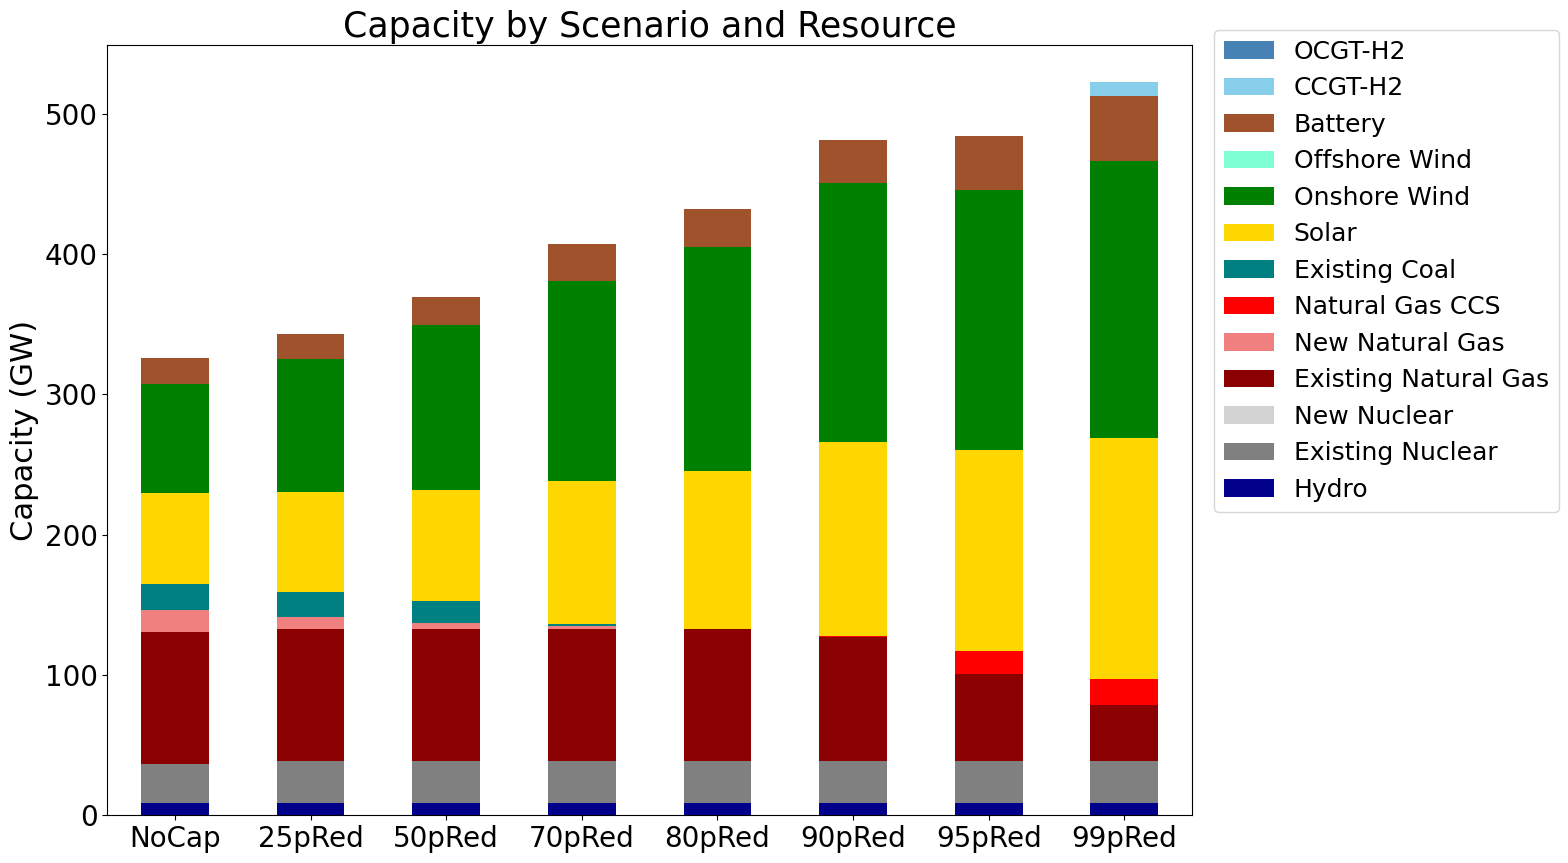

In [15]:
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine', 'sienna', 'skyblue', 'steelblue']

total_cap_ies.plot(kind='bar', stacked=True, color = color, figsize = (14,10))
plt.title('Capacity by Scenario and Resource', fontsize = 25)
plt.ylabel('Capacity (GW)',fontsize = 22)
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.ylim(0,325)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)

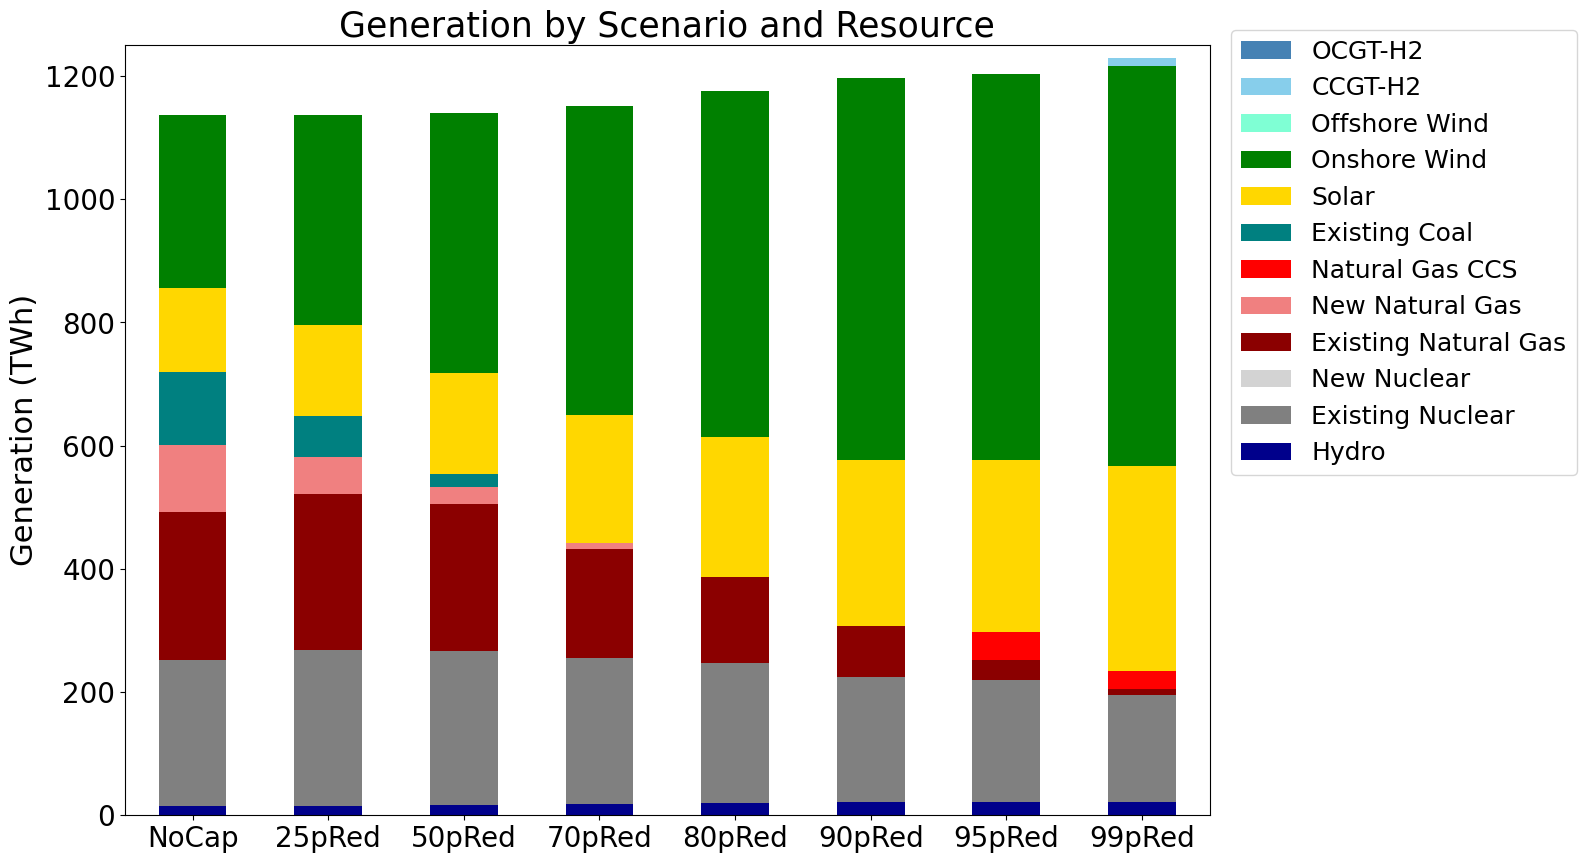

In [16]:
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine', 'skyblue', 'steelblue']

total_gen_ies.plot(kind='bar', stacked=True, color = color, figsize = (14,10))
plt.title('Generation by Scenario and Resource', fontsize = 25)
plt.ylabel('Generation (TWh)',fontsize = 22)
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0,1250)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)

### Capacity by Region and Scenario ###

In [77]:
os.chdir("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_IES_Simulations/Consolidated_Results/Power_System_Results/")
directory = Path.cwd()

In [47]:
# by scenario
regional_cap = pd.DataFrame(columns = scenario_labels)

resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'battery', 'solar|pv','landbasedwind|onshore_wind', 'offshorewind']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Existing Coal', 'Battery', 'Solar','Onshore Wind', 'Offshore Wind']
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind', 'Battery']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine', 'sienna']

for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'capacity.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]][locals()[scenarios[i]].columns[[0,1,5]]]
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['Resource'].str.contains(resource_abr[x]), 'Resource'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'Resource'])['EndCap'].sum()
    regional_cap[scenario_labels[i]] = locals()[scenarios[i]]


In [48]:
regional_cap

NoCap        25pRed        50pRed  \
Zone Resource                                                         
1.0  Battery                5077.509030   4771.102604   3385.489585   
     Existing Coal          4013.893298   4013.832909   4013.894839   
     Existing Natural Gas   4858.887642   4858.874456   4858.898664   
     Hydro                   401.464000    401.464000    401.464000   
     Natural Gas CCS           0.166365      0.108811      0.074210   
...                                 ...           ...           ...   
11.0 New Natural Gas         180.301424      1.253560      0.557548   
     New Nuclear               0.093622      0.051092      0.040380   
     Offshore Wind             0.030882      0.022654      0.011722   
     Onshore Wind             14.963254   1281.659472   9270.945805   
     Solar                 17511.411848  18259.111580  18190.102255   

                                 70pRed        80pRed        90pRed  \
Zone Resource                                                         
1.0  Battery                3073.331619   2228.867444    138.402528   
     Existing Coal             1.199061      0.514169      3.381864   
     Existing Natural Gas   4858.851881   4858.870920   3262.326086   
     Hydro                   401.464000    401.464000    401.464000   
     Natural Gas CCS           0.099698      0.071222      8.596148   
...                                 ...           ...           ...   
11.0 New Natural Gas           0.390245      0.197930      3.289664   
     New Nuclear               0.055013      0.038012      1.714226   
     Offshore Wind             0.019940      0.014236      0.389753   
     Onshore Wind          15933.348449  13909.292397  16520.619699   
     Solar                 19467.636369  17723.660459  19420.042513   

                                 95pRed        99pRed  
Zone Resource                                          
1.0  Battery                1240.232316   1791.847698  
     Existing Coal             0.076042      0.091946  
     Existing Natural Gas   1777.709753   1772.860348  
     Hydro                   401.464000    401.464000  
     Natural Gas CCS           0.655687      0.464580  
...                                 ...           ...  
11.0 New Natural Gas           0.075762      0.083854  
     New Nuclear               0.050024      0.089538  
     Offshore Wind             0.012647      0.014550  
     Onshore Wind          16740.182499  11688.588518  
     Solar                 24210.144059  30277.720203  

[107 rows x 8 columns]

## H2G2P Capacity by Region and Scenario ##

In [49]:
os.chdir("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_IES_Simulations/Consolidated_Results/HSC_Results/")
directory = Path.cwd()

In [50]:
regional_g2p_cap = pd.DataFrame(columns = scenario_labels)


resource_abr = ['CCGT-H2', 'OCGT-H2']

resource_name = ['CCGT-H2', 'OCGT-H2']

resource_order = ['CCGT-H2', 'OCGT-H2']

color = ['skyblue', 'steelblue']

for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'HSC_g2p_capacity.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]][locals()[scenarios[i]].columns[[0, 1, 5]]]
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['Resource'].str.contains(resource_abr[x]), 'Resource'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'Resource'])['EndCap'].sum()
    regional_g2p_cap[scenario_labels[i]] = locals()[scenarios[i]]

In [51]:
regional_g2p_cap

NoCap    25pRed    50pRed    70pRed    80pRed    90pRed  \
Zone Resource                                                                
1.0  CCGT-H2    0.298056  0.187588  0.104624  0.110561  0.069380  3.433980   
     OCGT-H2    0.740773  0.433065  0.181352  0.235049  0.135434  3.588558   
2.0  CCGT-H2    0.279303  0.175309  0.100621  0.097324  0.055325  3.032218   
     OCGT-H2    0.687008  0.396924  0.174953  0.196011  0.100498  3.349736   
3.0  CCGT-H2    0.535208  0.283442  0.127261  0.116419  0.067364  4.866427   
     OCGT-H2   12.140368  1.506649  0.261622  0.252888  0.142921  4.204900   
4.0  CCGT-H2    0.304577  0.185450  0.106259  0.114521  0.068789  3.735333   
     OCGT-H2    0.770857  0.425005  0.184321  0.243229  0.134123  3.719078   
5.0  CCGT-H2    0.250298  0.161796  0.088942  0.094128  0.063850  2.546647   
     OCGT-H2    0.527391  0.326985  0.142409  0.191269  0.125930  2.989905   
6.0  CCGT-H2    0.308232  0.194154  0.108428  0.112871  0.067094  3.819631   
     OCGT-H2    0.721726  0.424668  0.181443  0.239169  0.131799  3.745509   
7.0  CCGT-H2    0.312070  0.188109  0.107990  0.118313  0.067936  3.491932   
     OCGT-H2    0.826786  0.424632  0.186406  0.253304  0.129338  3.604122   
8.0  CCGT-H2    0.255034  0.173110  0.095268  0.103820  0.061739  2.767837   
     OCGT-H2    0.528684  0.356792  0.157646  0.215867  0.117918  3.098560   
9.0  CCGT-H2    0.281184  0.178303  0.102096  0.107078  0.058250  2.793094   
     OCGT-H2    0.696875  0.397887  0.175754  0.228906  0.104954  3.166093   
10.0 CCGT-H2    0.288665  0.179162  0.103480  0.111457  0.069095  3.496872   
     OCGT-H2    0.681580  0.391996  0.174678  0.238118  0.139684  3.508986   
11.0 CCGT-H2    0.398699  0.199409  0.100812  0.096590  0.056502  3.549158   
     OCGT-H2    1.764184  0.493389  0.176594  0.196428  0.101145  3.589854   

                  95pRed       99pRed  
Zone Resource                          
1.0  CCGT-H2    1.507013  2010.104944  
     OCGT-H2    0.481037     0.642981  
2.0  CCGT-H2    5.883839  1190.672115  
     OCGT-H2    0.377640     0.538391  
3.0  CCGT-H2   54.884093  1009.834104  
     OCGT-H2    0.402651     0.539732  
4.0  CCGT-H2   19.814989   605.005600  
     OCGT-H2    0.419278     0.653197  
5.0  CCGT-H2    0.303494   214.886747  
     OCGT-H2    0.216251     0.606522  
6.0  CCGT-H2   59.700797  2351.819547  
     OCGT-H2    0.752794     0.623992  
7.0  CCGT-H2    9.884379   585.220736  
     OCGT-H2    0.410053     0.650553  
8.0  CCGT-H2    0.280071     2.275566  
     OCGT-H2    0.231417     0.541953  
9.0  CCGT-H2    9.838616   663.737118  
     OCGT-H2    0.394705     0.539972  
10.0 CCGT-H2    1.097432   632.458682  
     OCGT-H2    0.425610     0.595449  
11.0 CCGT-H2   15.265420   908.590289  
     OCGT-H2    0.417061     0.521324

In [52]:
regional_cap.reset_index(inplace=True)

In [53]:
regional_cap

,Zone,Resource,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
0,1.0,Battery,5077.509030,4771.102604,3385.489585,3073.331619,2228.867444,138.402528,1240.232316,1791.847698
1,1.0,Existing Coal,4013.893298,4013.832909,4013.894839,1.199061,0.514169,3.381864,0.076042,0.091946
2,1.0,Existing Natural Gas,4858.887642,4858.874456,4858.898664,4858.851881,4858.870920,3262.326086,1777.709753,1772.860348
3,1.0,Hydro,401.464000,401.464000,401.464000,401.464000,401.464000,401.464000,401.464000,401.464000
4,1.0,Natural Gas CCS,0.166365,0.108811,0.074210,0.099698,0.071222,8.596148,0.655687,0.464580
...,...,...,...,...,...,...,...,...,...,...
102,11.0,New Natural Gas,180.301424,1.253560,0.557548,0.390245,0.197930,3.289664,0.075762,0.083854
103,11.0,New Nuclear,0.093622,0.051092,0.040380,0.055013,0.038012,1.714226,0.050024,0.089538
104,11.0,Offshore Wind,0.030882,0.022654,0.011722,0.019940,0.014236,0.389753,0.012647,0.014550
105,11.0,Onshore Wind,14.963254,1281.659472,9270.945805,15933.348449,13909.292397,16520.619699,16740.182499,11688.588518


In [54]:
sub_regional_cap = regional_cap[regional_cap.Zone == 11.0].iloc[:, 1:]


In [55]:
sub_regional_cap

,Resource,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
96,Battery,4699.344484,4645.705110,3699.863031,4266.179379,4023.674049,3998.763386,7040.720889,8270.254987
97,Existing Coal,218.997231,218.979073,0.586491,0.264410,0.124257,1.874357,0.066422,0.072354
98,Existing Natural Gas,16451.567377,16451.548177,16451.579284,16451.509407,16451.523974,14424.037898,9404.781320,5299.346302
99,Existing Nuclear,8500.565204,8500.672007,8500.696534,8500.686551,8500.692472,8500.588143,8500.697834,8500.698970
100,Hydro,2066.149000,2066.149000,2066.149000,2066.149000,2066.149000,2066.149000,2066.149000,2066.149000
101,Natural Gas CCS,0.175021,0.106930,0.071998,0.090928,0.065202,7.270440,1886.691893,5339.094436
102,New Natural Gas,180.301424,1.253560,0.557548,0.390245,0.197930,3.289664,0.075762,0.083854
103,New Nuclear,0.093622,0.051092,0.040380,0.055013,0.038012,1.714226,0.050024,0.089538
104,Offshore Wind,0.030882,0.022654,0.011722,0.019940,0.014236,0.389753,0.012647,0.014550
105,Onshore Wind,14.963254,1281.659472,9270.945805,15933.348449,13909.292397,16520.619699,16740.182499,11688.588518


In [56]:
sub_regional_cap = sub_regional_cap.T


In [57]:
sub_regional_cap

,96,97,98,99,100,101,102,103,104,105,106
Resource,Battery,Existing Coal,Existing Natural Gas,Existing Nuclear,Hydro,Natural Gas CCS,New Natural Gas,New Nuclear,Offshore Wind,Onshore Wind,Solar
NoCap,4699.344484,218.997231,16451.567377,8500.565204,2066.149,0.175021,180.301424,0.093622,0.030882,14.963254,17511.411848
25pRed,4645.70511,218.979073,16451.548177,8500.672007,2066.149,0.10693,1.25356,0.051092,0.022654,1281.659472,18259.11158
50pRed,3699.863031,0.586491,16451.579284,8500.696534,2066.149,0.071998,0.557548,0.04038,0.011722,9270.945805,18190.102255
70pRed,4266.179379,0.26441,16451.509407,8500.686551,2066.149,0.090928,0.390245,0.055013,0.01994,15933.348449,19467.636369
80pRed,4023.674049,0.124257,16451.523974,8500.692472,2066.149,0.065202,0.19793,0.038012,0.014236,13909.292397,17723.660459
90pRed,3998.763386,1.874357,14424.037898,8500.588143,2066.149,7.27044,3.289664,1.714226,0.389753,16520.619699,19420.042513
95pRed,7040.720889,0.066422,9404.78132,8500.697834,2066.149,1886.691893,0.075762,0.050024,0.012647,16740.182499,24210.144059
99pRed,8270.254987,0.072354,5299.346302,8500.69897,2066.149,5339.094436,0.083854,0.089538,0.01455,11688.588518,30277.720203


In [58]:
sub_regional_cap.set_axis(sub_regional_cap.iloc[0], axis=1, inplace=True)
sub_regional_cap = sub_regional_cap[1:]

/var/folders/jb/2sqt8fd5643gdpy3ptb304_80000gr/T/ipykernel_67122/193263863.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sub_regional_cap.set_axis(sub_regional_cap.iloc[0], axis=1, inplace=True)


In [59]:
sub_regional_cap

Resource,Battery,Existing Coal,Existing Natural Gas,Existing Nuclear,Hydro,Natural Gas CCS,New Natural Gas,New Nuclear,Offshore Wind,Onshore Wind,Solar
NoCap,4699.344484,218.997231,16451.567377,8500.565204,2066.149,0.175021,180.301424,0.093622,0.030882,14.963254,17511.411848
25pRed,4645.70511,218.979073,16451.548177,8500.672007,2066.149,0.10693,1.25356,0.051092,0.022654,1281.659472,18259.11158
50pRed,3699.863031,0.586491,16451.579284,8500.696534,2066.149,0.071998,0.557548,0.04038,0.011722,9270.945805,18190.102255
70pRed,4266.179379,0.26441,16451.509407,8500.686551,2066.149,0.090928,0.390245,0.055013,0.01994,15933.348449,19467.636369
80pRed,4023.674049,0.124257,16451.523974,8500.692472,2066.149,0.065202,0.19793,0.038012,0.014236,13909.292397,17723.660459
90pRed,3998.763386,1.874357,14424.037898,8500.588143,2066.149,7.27044,3.289664,1.714226,0.389753,16520.619699,19420.042513
95pRed,7040.720889,0.066422,9404.78132,8500.697834,2066.149,1886.691893,0.075762,0.050024,0.012647,16740.182499,24210.144059
99pRed,8270.254987,0.072354,5299.346302,8500.69897,2066.149,5339.094436,0.083854,0.089538,0.01455,11688.588518,30277.720203


In [60]:
regional_g2p_cap.reset_index(inplace=True)

In [61]:
sub_regional_g2p_cap = regional_g2p_cap[regional_g2p_cap.Zone == 11.0].iloc[:, 1:]

In [62]:
sub_regional_g2p_cap

,Resource,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
20,CCGT-H2,0.398699,0.199409,0.100812,0.096590,0.056502,3.549158,15.265420,908.590289
21,OCGT-H2,1.764184,0.493389,0.176594,0.196428,0.101145,3.589854,0.417061,0.521324


In [63]:
sub_regional_g2p_cap = sub_regional_g2p_cap.T

In [64]:
sub_regional_g2p_cap

,20,21
Resource,CCGT-H2,OCGT-H2
NoCap,0.398699,1.764184
25pRed,0.199409,0.493389
50pRed,0.100812,0.176594
70pRed,0.09659,0.196428
80pRed,0.056502,0.101145
90pRed,3.549158,3.589854
95pRed,15.26542,0.417061
99pRed,908.590289,0.521324


In [65]:
sub_regional_g2p_cap.set_axis(sub_regional_g2p_cap.iloc[0], axis=1, inplace=True)

/var/folders/jb/2sqt8fd5643gdpy3ptb304_80000gr/T/ipykernel_67122/1859444626.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sub_regional_g2p_cap.set_axis(sub_regional_g2p_cap.iloc[0], axis=1, inplace=True)


In [66]:
sub_regional_g2p_cap

Resource,CCGT-H2,OCGT-H2
Resource,CCGT-H2,OCGT-H2
NoCap,0.398699,1.764184
25pRed,0.199409,0.493389
50pRed,0.100812,0.176594
70pRed,0.09659,0.196428
80pRed,0.056502,0.101145
90pRed,3.549158,3.589854
95pRed,15.26542,0.417061
99pRed,908.590289,0.521324


In [67]:
sub_regional_g2p_cap = sub_regional_g2p_cap[1:]

In [68]:
sub_regional_g2p_cap

Resource,CCGT-H2,OCGT-H2
NoCap,0.398699,1.764184
25pRed,0.199409,0.493389
50pRed,0.100812,0.176594
70pRed,0.09659,0.196428
80pRed,0.056502,0.101145
90pRed,3.549158,3.589854
95pRed,15.26542,0.417061
99pRed,908.590289,0.521324


In [69]:
sub_regional_cap

Resource,Battery,Existing Coal,Existing Natural Gas,Existing Nuclear,Hydro,Natural Gas CCS,New Natural Gas,New Nuclear,Offshore Wind,Onshore Wind,Solar
NoCap,4699.344484,218.997231,16451.567377,8500.565204,2066.149,0.175021,180.301424,0.093622,0.030882,14.963254,17511.411848
25pRed,4645.70511,218.979073,16451.548177,8500.672007,2066.149,0.10693,1.25356,0.051092,0.022654,1281.659472,18259.11158
50pRed,3699.863031,0.586491,16451.579284,8500.696534,2066.149,0.071998,0.557548,0.04038,0.011722,9270.945805,18190.102255
70pRed,4266.179379,0.26441,16451.509407,8500.686551,2066.149,0.090928,0.390245,0.055013,0.01994,15933.348449,19467.636369
80pRed,4023.674049,0.124257,16451.523974,8500.692472,2066.149,0.065202,0.19793,0.038012,0.014236,13909.292397,17723.660459
90pRed,3998.763386,1.874357,14424.037898,8500.588143,2066.149,7.27044,3.289664,1.714226,0.389753,16520.619699,19420.042513
95pRed,7040.720889,0.066422,9404.78132,8500.697834,2066.149,1886.691893,0.075762,0.050024,0.012647,16740.182499,24210.144059
99pRed,8270.254987,0.072354,5299.346302,8500.69897,2066.149,5339.094436,0.083854,0.089538,0.01455,11688.588518,30277.720203


In [70]:
sub_regional_cap = pd.concat([sub_regional_cap, sub_regional_g2p_cap], axis=1)

In [71]:
sub_regional_cap

Resource,Battery,Existing Coal,Existing Natural Gas,Existing Nuclear,Hydro,Natural Gas CCS,New Natural Gas,New Nuclear,Offshore Wind,Onshore Wind,Solar,CCGT-H2,OCGT-H2
NoCap,4699.344484,218.997231,16451.567377,8500.565204,2066.149,0.175021,180.301424,0.093622,0.030882,14.963254,17511.411848,0.398699,1.764184
25pRed,4645.70511,218.979073,16451.548177,8500.672007,2066.149,0.10693,1.25356,0.051092,0.022654,1281.659472,18259.11158,0.199409,0.493389
50pRed,3699.863031,0.586491,16451.579284,8500.696534,2066.149,0.071998,0.557548,0.04038,0.011722,9270.945805,18190.102255,0.100812,0.176594
70pRed,4266.179379,0.26441,16451.509407,8500.686551,2066.149,0.090928,0.390245,0.055013,0.01994,15933.348449,19467.636369,0.09659,0.196428
80pRed,4023.674049,0.124257,16451.523974,8500.692472,2066.149,0.065202,0.19793,0.038012,0.014236,13909.292397,17723.660459,0.056502,0.101145
90pRed,3998.763386,1.874357,14424.037898,8500.588143,2066.149,7.27044,3.289664,1.714226,0.389753,16520.619699,19420.042513,3.549158,3.589854
95pRed,7040.720889,0.066422,9404.78132,8500.697834,2066.149,1886.691893,0.075762,0.050024,0.012647,16740.182499,24210.144059,15.26542,0.417061
99pRed,8270.254987,0.072354,5299.346302,8500.69897,2066.149,5339.094436,0.083854,0.089538,0.01455,11688.588518,30277.720203,908.590289,0.521324


In [72]:
#sub_regional_cap['Existing Nuclear'] = 0

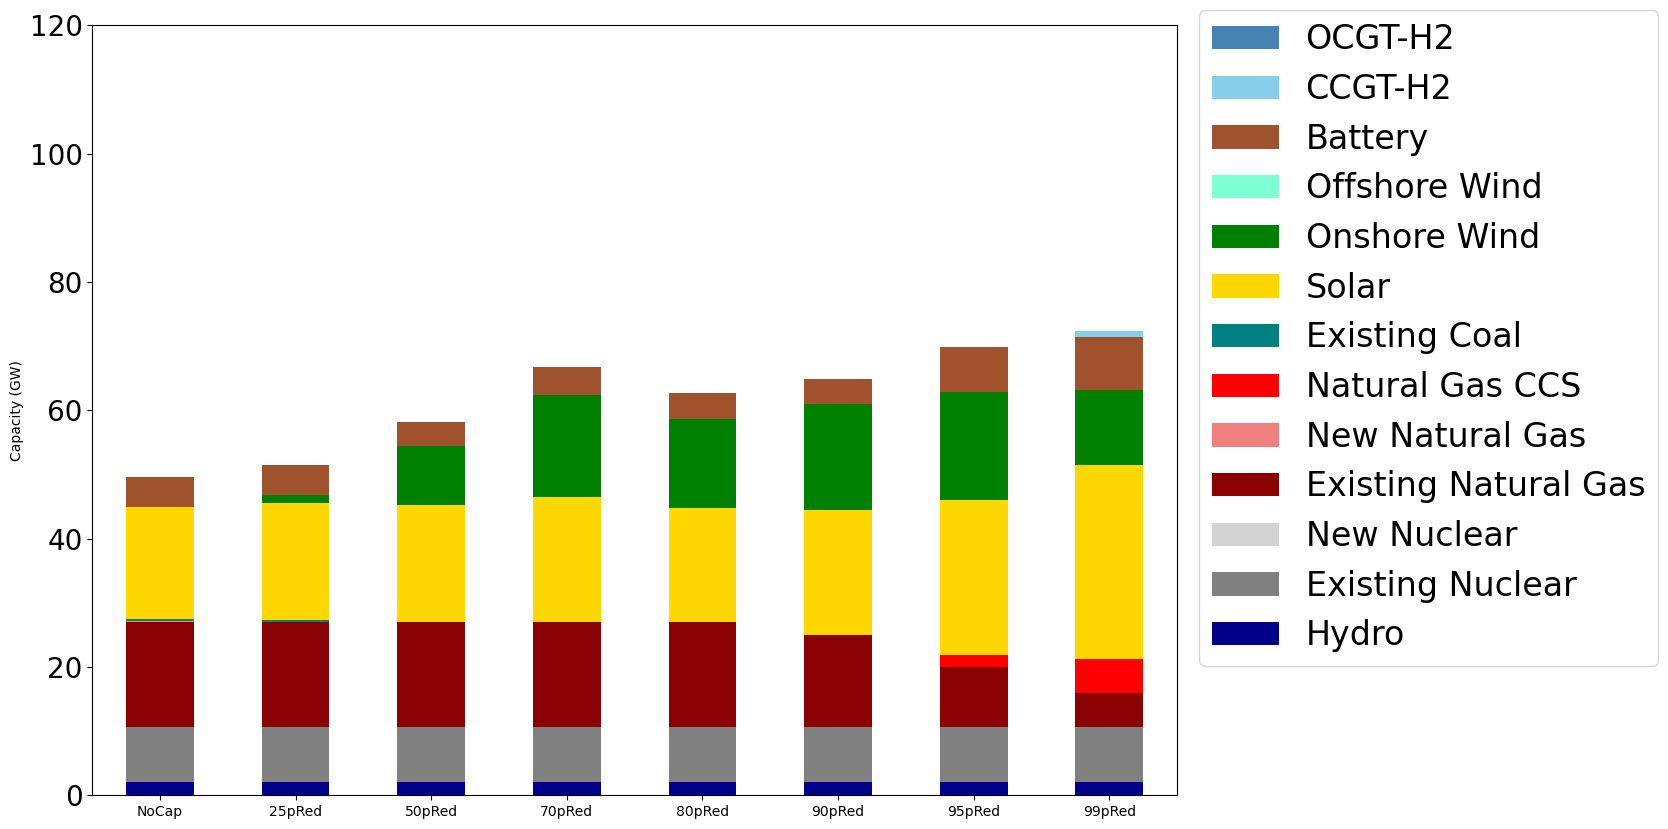

In [73]:
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind', 'Battery', 'CCGT-H2', 'OCGT-H2']
sub_regional_cap = sub_regional_cap[resource_order]/1000
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine', 'sienna', 'skyblue', 'steelblue']
sub_regional_cap.plot(kind='bar', stacked=True, color = color, figsize = (14,10), legend = True)
#plt.title('Capacity by Scenario and Resource', fontsize = 12)
plt.ylabel('Capacity (GW)',fontsize = 10)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 20)
plt.ylim(0,120)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 24)

### Computing Generation Mix by Scenario and Resource ###

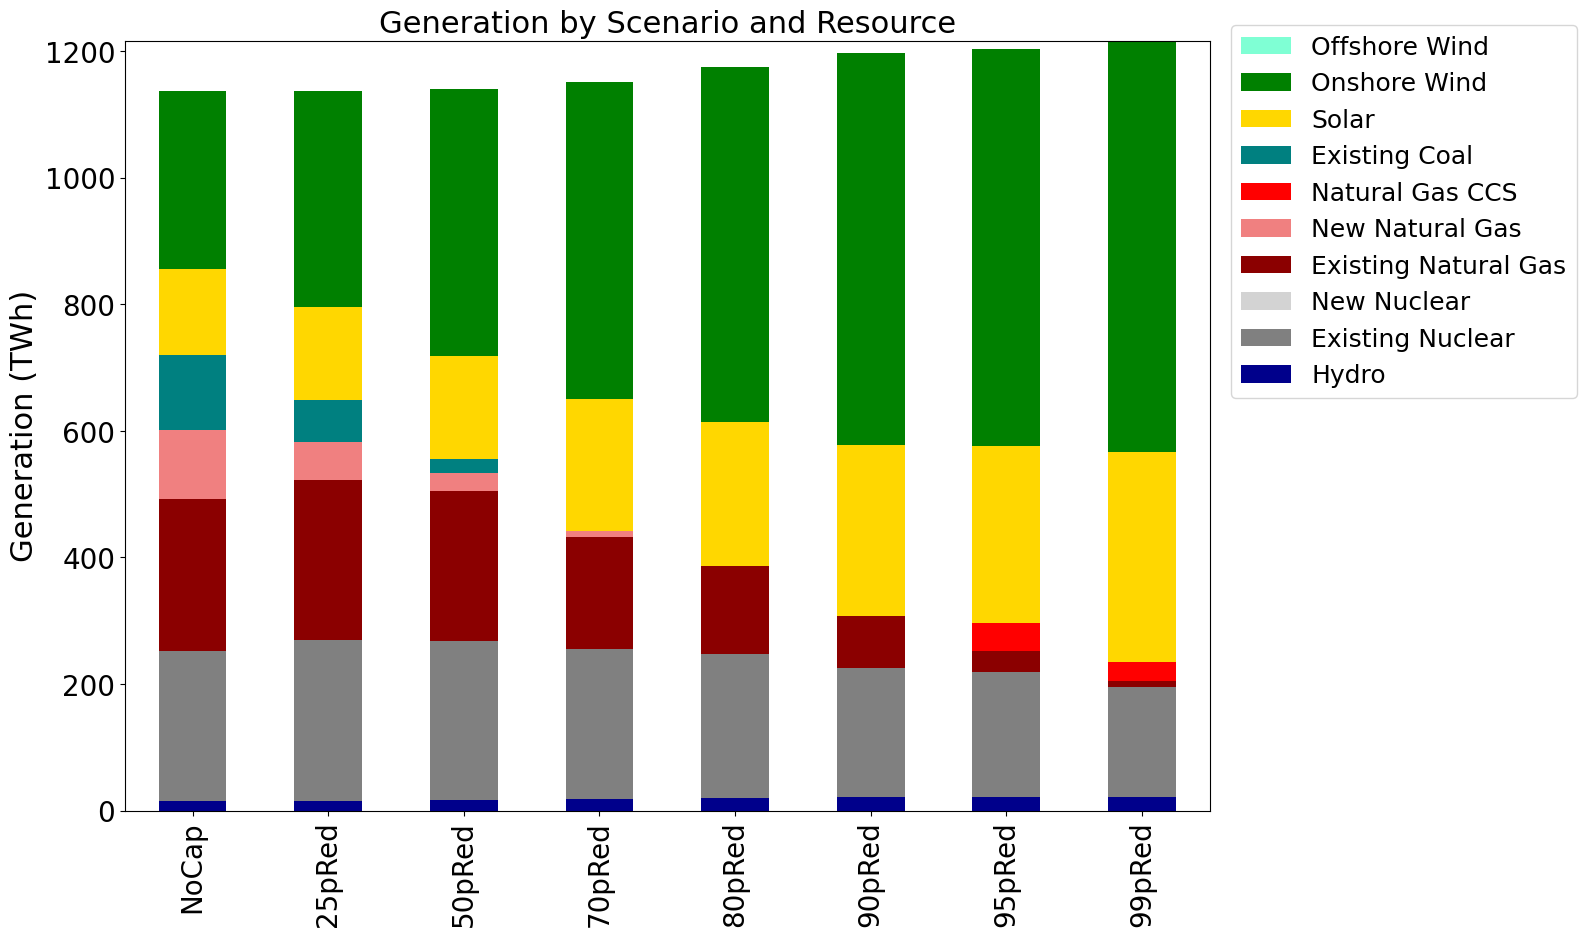

In [78]:
# by scenario
total_gen = pd.DataFrame(columns = scenario_labels)

resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'solar|pv','landbasedwind|onshore_wind', 'offshorewind']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind']
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine']


for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'power.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index','AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['index'])['AnnualSum'].sum()
    total_gen[scenario_labels[i]] = locals()[scenarios[i]]

total_gen = total_gen.T
total_gen = total_gen[resource_order]/1000000
total_gen.plot(kind='bar', stacked=True, color = color, figsize = (14,10))
plt.title('Generation by Scenario and Resource', fontsize = 22)
plt.ylabel('Generation (TWh)', fontsize = 22)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.ylim(0,300)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)

In [79]:
# by scenario
regional_gen = pd.DataFrame(columns = scenario_labels)


In [80]:
for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'power.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index', 'Zone', 'AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'index'])['AnnualSum'].sum()
    regional_gen[scenario_labels[i]] = locals()[scenarios[i]]


In [81]:
regional_gen

NoCap           25pRed  \
Zone index                                                           
0.0  Total                           1152807700.0     1153462500.0   
1.0  Existing Coal                     30125116.0       15236381.0   
     Existing Natural Gas             3820609.643      4129984.228   
     Hydro                            2874594.277      2864486.277   
     MIS_INKY_battery_moderate_0        3823418.8        4367672.5   
...                                           ...              ...   
11.0 New Nuclear                        595.24286        338.81808   
     Offshore Wind                      100.80108         75.96661   
     Onshore Wind                       54107.798    4679707.26213   
     PJM_EMAC_battery_moderate_0        3769139.5        3891250.8   
     Solar                        38424152.525668  40063840.878695   

                                          50pRed           70pRed  \
Zone index                                                          
0.0  Total                          1160007800.0     1179952300.0   
1.0  Existing Coal                     5734731.5          497.148   
     Existing Natural Gas           5061224.4852       3913594.85   
     Hydro                           2846944.477      2792936.777   
     MIS_INKY_battery_moderate_0       3789812.8        3107235.2   
...                                          ...              ...   
11.0 New Nuclear                       260.20062        370.59766   
     Offshore Wind                      37.70847         63.23256   
     Onshore Wind                 33843874.44653   57994970.31175   
     PJM_EMAC_battery_moderate_0       3563770.8        4347875.5   
     Solar                        39887374.44884  42490116.164376   

                                           80pRed          90pRed  \
Zone index                                                          
0.0  Total                           1204664000.0    1226409900.0   
1.0  Existing Coal                      137.74016       1120.7147   
     Existing Natural Gas            2734288.3905    1205919.1959   
     Hydro                            2730684.077     2596173.777   
     MIS_INKY_battery_moderate_0        2221614.8       154602.83   
...                                           ...             ...   
11.0 New Nuclear                        255.16206       11216.266   
     Offshore Wind                       45.46122       1182.8977   
     Onshore Wind                  50362738.89497    58595122.217   
     PJM_EMAC_battery_moderate_0        3888645.0       3409801.2   
     Solar                        38580789.914659  41298686.92396   

                                           95pRed           99pRed  
Zone index                                                          
0.0  Total                           1243232300.0     1267894400.0  
1.0  Existing Coal                      15.569977         5.391046  
     Existing Natural Gas            154543.21931     28675.472831  
     Hydro                            2627218.477      2619724.777  
     MIS_INKY_battery_moderate_0        1029541.4        1757250.1  
...                                           ...              ...  
11.0 New Nuclear                         318.1719         524.4807  
     Offshore Wind                      37.539246        41.768143  
     Onshore Wind                  59546500.69152   41376120.45515  
     PJM_EMAC_battery_moderate_0        6933507.5        9859067.0  
     Solar                        51299569.631905  64363600.768024  

[108 rows x 8 columns]

In [82]:
regional_gen.reset_index(inplace=True)

In [83]:
regional_gen

,Zone,index,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
0,0.0,Total,1152807700.0,1153462500.0,1160007800.0,1179952300.0,1204664000.0,1226409900.0,1243232300.0,1267894400.0
1,1.0,Existing Coal,30125116.0,15236381.0,5734731.5,497.148,137.74016,1120.7147,15.569977,5.391046
2,1.0,Existing Natural Gas,3820609.643,4129984.228,5061224.4852,3913594.85,2734288.3905,1205919.1959,154543.21931,28675.472831
3,1.0,Hydro,2874594.277,2864486.277,2846944.477,2792936.777,2730684.077,2596173.777,2627218.477,2619724.777
4,1.0,MIS_INKY_battery_moderate_0,3823418.8,4367672.5,3789812.8,3107235.2,2221614.8,154602.83,1029541.4,1757250.1
...,...,...,...,...,...,...,...,...,...,...
103,11.0,New Nuclear,595.24286,338.81808,260.20062,370.59766,255.16206,11216.266,318.1719,524.4807
104,11.0,Offshore Wind,100.80108,75.96661,37.70847,63.23256,45.46122,1182.8977,37.539246,41.768143
105,11.0,Onshore Wind,54107.798,4679707.26213,33843874.44653,57994970.31175,50362738.89497,58595122.217,59546500.69152,41376120.45515
106,11.0,PJM_EMAC_battery_moderate_0,3769139.5,3891250.8,3563770.8,4347875.5,3888645.0,3409801.2,6933507.5,9859067.0


In [84]:
sub_regional_gen = regional_gen[regional_gen.Zone == 11.0].iloc[:, 1:]

In [85]:
sub_regional_gen

,index,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
97,Existing Coal,651022.0,200761.58,670.3401,195.39911,84.91494,882.54785,12.719109,4.550317
98,Existing Natural Gas,53576691.4,54320001.54,41763958.94,29364685.13,23900579.24,14601438.7815,7797088.69878,5797643.208342
99,Existing Nuclear,74230115.0,73997186.0,72821146.0,68733631.0,66112439.0,59465283.5,57359150.5,56173674.5
100,Hydro,2913607.2777,3014195.5777,3666758.3777,3962324.7777,4274378.1777,4993958.9777,4905176.5777,4960903.9777
101,Natural Gas CCS,795.5363,554.9235,361.94485,488.46368,341.4238,28000.482,5624227.5,9302275.0
102,New Natural Gas,1443467.3332,7786.8884,2895.88093,1573.79121,673.4749,6923.7276,99.328044,38.508851
103,New Nuclear,595.24286,338.81808,260.20062,370.59766,255.16206,11216.266,318.1719,524.4807
104,Offshore Wind,100.80108,75.96661,37.70847,63.23256,45.46122,1182.8977,37.539246,41.768143
105,Onshore Wind,54107.798,4679707.26213,33843874.44653,57994970.31175,50362738.89497,58595122.217,59546500.69152,41376120.45515
106,PJM_EMAC_battery_moderate_0,3769139.5,3891250.8,3563770.8,4347875.5,3888645.0,3409801.2,6933507.5,9859067.0


In [86]:
sub_regional_gen = sub_regional_gen.T


In [87]:
sub_regional_gen.set_axis(sub_regional_gen.iloc[0], axis=1, inplace=True)
sub_regional_gen = sub_regional_gen[1:]

/var/folders/jb/2sqt8fd5643gdpy3ptb304_80000gr/T/ipykernel_67122/2559392540.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sub_regional_gen.set_axis(sub_regional_gen.iloc[0], axis=1, inplace=True)


In [88]:
sub_regional_gen

index,Existing Coal,Existing Natural Gas,Existing Nuclear,Hydro,Natural Gas CCS,New Natural Gas,New Nuclear,Offshore Wind,Onshore Wind,PJM_EMAC_battery_moderate_0,Solar
NoCap,651022.0,53576691.4,74230115.0,2913607.2777,795.5363,1443467.3332,595.24286,100.80108,54107.798,3769139.5,38424152.525668
25pRed,200761.58,54320001.54,73997186.0,3014195.5777,554.9235,7786.8884,338.81808,75.96661,4679707.26213,3891250.8,40063840.878695
50pRed,670.3401,41763958.94,72821146.0,3666758.3777,361.94485,2895.88093,260.20062,37.70847,33843874.44653,3563770.8,39887374.44884
70pRed,195.39911,29364685.13,68733631.0,3962324.7777,488.46368,1573.79121,370.59766,63.23256,57994970.31175,4347875.5,42490116.164376
80pRed,84.91494,23900579.24,66112439.0,4274378.1777,341.4238,673.4749,255.16206,45.46122,50362738.89497,3888645.0,38580789.914659
90pRed,882.54785,14601438.7815,59465283.5,4993958.9777,28000.482,6923.7276,11216.266,1182.8977,58595122.217,3409801.2,41298686.92396
95pRed,12.719109,7797088.69878,57359150.5,4905176.5777,5624227.5,99.328044,318.1719,37.539246,59546500.69152,6933507.5,51299569.631905
99pRed,4.550317,5797643.208342,56173674.5,4960903.9777,9302275.0,38.508851,524.4807,41.768143,41376120.45515,9859067.0,64363600.768024


In [89]:
#sub_regional_gen['Existing Nuclear'] = 0

(0.0, 300.0)

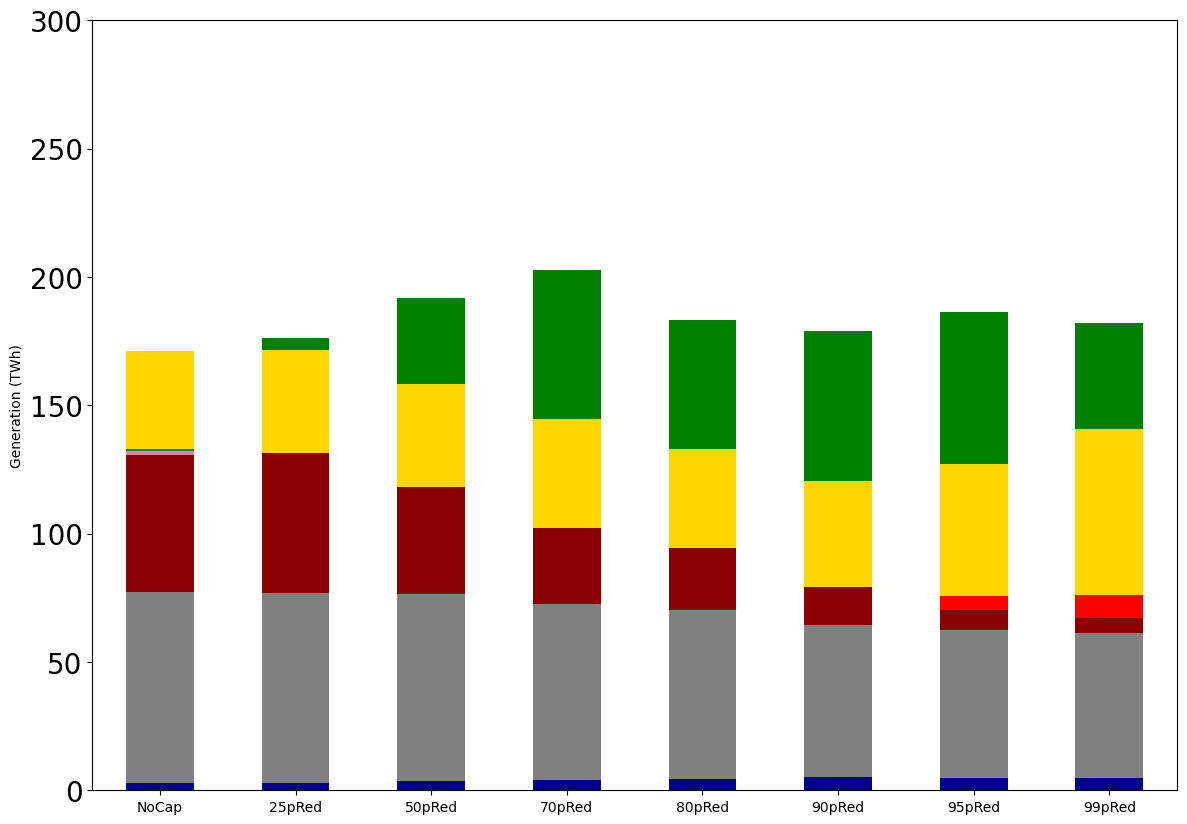

In [90]:
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine']

sub_regional_gen = sub_regional_gen[resource_order]/1000000
sub_regional_gen.plot(kind='bar', stacked=True, color = color, figsize = (14,10), legend = False)
#plt.title('Generation by Scenario and Resource', fontsize = 22)
plt.ylabel('Generation (TWh)', fontsize = 10)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 20)
plt.ylim(0,300)
#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)

### Computing Power Balance by Scenario ###

In [91]:
os.chdir("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_IES_Simulations/Consolidated_Results/Power_System_Results/")
directory = Path.cwd()

In [92]:
# by scenario
regional_pow_bal = pd.DataFrame(columns = scenario_labels)

In [93]:
for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'power_balance.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    #for x in range(len(resource_abr)):
    #    locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index', 'Zone', 'AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'index'])['AnnualSum'].sum()
    regional_pow_bal[scenario_labels[i]] = locals()[scenarios[i]]


In [94]:
regional_pow_bal

NoCap            25pRed  \
Zone index                                                           
1.0  Additional Demand             329846.458407     329294.604025   
     Demand                    -114558668.326612 -114558668.326612   
     Demand_Response                         0.0               0.0   
     Flexible_Demand_Defer                   0.0               0.0   
     Flexible_Demand_Stasify                 0.0               0.0   
...                                          ...               ...   
11.0 Storage_Charge.10           -6157610.486015   -6436328.568522   
     Storage_Discharge.10         5047415.786999    5270356.175196   
     Transmission.10            -24751252.411311  -19917740.475699   
     Transmission_Losses.10                  0.0               0.0   
     Transmission_NetExport.10   24751252.411311   19917740.475699   

                                          50pRed            70pRed  \
Zone index                                                           
1.0  Additional Demand             328890.710787    7503084.305267   
     Demand                    -114558668.326612 -114558668.326612   
     Demand_Response                         0.0               0.0   
     Flexible_Demand_Defer                   0.0               0.0   
     Flexible_Demand_Stasify                 0.0               0.0   
...                                          ...               ...   
11.0 Storage_Charge.10           -6920425.237915   -8249924.412758   
     Storage_Discharge.10          5596092.30151    6682503.944709   
     Transmission.10             -5026240.409737    4988306.793295   
     Transmission_Losses.10                  0.0               0.0   
     Transmission_NetExport.10    5026240.409737   -4988306.793295   

                                          80pRed            90pRed  \
Zone index                                                           
1.0  Additional Demand           12867241.550269   17146535.901548   
     Demand                    -114558668.326612 -114558668.326612   
     Demand_Response                         0.0               0.0   
     Flexible_Demand_Defer                   0.0               0.0   
     Flexible_Demand_Stasify                 0.0               0.0   
...                                          ...               ...   
11.0 Storage_Charge.10           -8133971.682838   -8563414.569525   
     Storage_Discharge.10         6543216.928633    6810719.198876   
     Transmission.10            -15294577.548012  -20970487.499731   
     Transmission_Losses.10                  0.0               0.0   
     Transmission_NetExport.10   15294577.548012   20970487.499731   

                                          95pRed            99pRed  
Zone index                                                          
1.0  Additional Demand           18752164.637712   23313898.808176  
     Demand                    -114558668.326612 -114558668.326612  
     Demand_Response                         0.0               0.0  
     Flexible_Demand_Defer                   0.0               0.0  
     Flexible_Demand_Stasify                 0.0               0.0  
...                                          ...               ...  
11.0 Storage_Charge.10          -12610485.093227  -16120850.982386  
     Storage_Discharge.10        10247355.300047   13213331.420923  
     Transmission.10            -14272415.142077  -19771525.397172  
     Transmission_Losses.10                  0.0               0.0  
     Transmission_NetExport.10   14272415.142077   19771525.397172  

[154 rows x 8 columns]

In [95]:
pow_bal_abr = ['Generation', 'Storage_Discharge', 'Storage_Charge', 'Transmission_NetExport', 'Demand']
pow_bal_name = ['Generation', 'Storage Discharge','Storage Charge', 'Transmission Net Export', 'Demand']
pow_bal_order = ['Generation', 'Storage Discharge', 'Storage Charge', 'Transmission Net Export', 'Demand']


In [96]:
regional_pow_bal.reset_index(inplace=True)

In [97]:
regional_pow_bal

,Zone,index,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
0,1.0,Additional Demand,329846.458407,329294.604025,328890.710787,7503084.305267,12867241.550269,17146535.901548,18752164.637712,23313898.808176
1,1.0,Demand,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612
2,1.0,Demand_Response,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,Flexible_Demand_Defer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,Flexible_Demand_Stasify,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
149,11.0,Storage_Charge.10,-6157610.486015,-6436328.568522,-6920425.237915,-8249924.412758,-8133971.682838,-8563414.569525,-12610485.093227,-16120850.982386
150,11.0,Storage_Discharge.10,5047415.786999,5270356.175196,5596092.30151,6682503.944709,6543216.928633,6810719.198876,10247355.300047,13213331.420923
151,11.0,Transmission.10,-24751252.411311,-19917740.475699,-5026240.409737,4988306.793295,-15294577.548012,-20970487.499731,-14272415.142077,-19771525.397172
152,11.0,Transmission_Losses.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
regional_pow_bal = regional_pow_bal.rename(columns={'index': 'Source'})

In [99]:
regional_pow_bal['Source'] = regional_pow_bal['Source'].astype('string')

In [100]:
for i in range(len(pow_bal_abr)):
    regional_pow_bal.loc[regional_pow_bal.Source.str.contains(pow_bal_abr[i]), 'Source'] = pow_bal_name[i]


In [101]:
regional_pow_bal

,Zone,Source,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
0,1.0,Demand,329846.458407,329294.604025,328890.710787,7503084.305267,12867241.550269,17146535.901548,18752164.637712,23313898.808176
1,1.0,Demand,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612,-114558668.326612
2,1.0,Demand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,Demand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,Demand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
149,11.0,Storage Charge,-6157610.486015,-6436328.568522,-6920425.237915,-8249924.412758,-8133971.682838,-8563414.569525,-12610485.093227,-16120850.982386
150,11.0,Storage Discharge,5047415.786999,5270356.175196,5596092.30151,6682503.944709,6543216.928633,6810719.198876,10247355.300047,13213331.420923
151,11.0,Transmission.10,-24751252.411311,-19917740.475699,-5026240.409737,4988306.793295,-15294577.548012,-20970487.499731,-14272415.142077,-19771525.397172
152,11.0,Transmission_Losses.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
sub_regional_pow_bal = regional_pow_bal[regional_pow_bal.Zone == 11.0].iloc[:, 1:]

In [103]:
sub_regional_pow_bal

,Source,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
140,Demand,34428.611215,33828.055612,33438.241923,34582.62074,658007.443462,1207645.073652,1523532.723637,3049997.513737
141,Demand,-193623663.730292,-193623663.730292,-193623663.730292,-193623663.730292,-193623663.730292,-193623663.730292,-193623663.730292,-193623663.730292
142,Demand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,Demand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,Demand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,Generation,170016380.700653,174905347.608168,189955020.710194,200213791.607044,180577754.593376,175601776.229642,183218328.560547,178620561.618341
146,H2-G2P.10,654.928902,376.94368,174.081311,184.597315,96.286102,11829.095501,19584.013036,1189093.790912
147,HSC_Consumption.10,-34428.611215,-33828.055612,-33438.241923,-34582.62074,-658007.443462,-1207645.073652,-1523532.723637,-3049997.513737
148,Nonserved_Energy.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,Storage Charge,-6157610.486015,-6436328.568522,-6920425.237915,-8249924.412758,-8133971.682838,-8563414.569525,-12610485.093227,-16120850.982386


In [104]:
sub_regional_pow_bal = sub_regional_pow_bal.T


In [105]:
sub_regional_pow_bal

,140,141,142,143,144,145,146,147,148,149,150,151,152,153
Source,Demand,Demand,Demand,Demand,Demand,Generation,H2-G2P.10,HSC_Consumption.10,Nonserved_Energy.10,Storage Charge,Storage Discharge,Transmission.10,Transmission_Losses.10,Transmission Net Export
NoCap,34428.611215,-193623663.730292,0.0,0.0,0.0,170016380.700653,654.928902,-34428.611215,0.0,-6157610.486015,5047415.786999,-24751252.411311,0.0,24751252.411311
25pRed,33828.055612,-193623663.730292,0.0,0.0,0.0,174905347.608168,376.94368,-33828.055612,0.0,-6436328.568522,5270356.175196,-19917740.475699,0.0,19917740.475699
50pRed,33438.241923,-193623663.730292,0.0,0.0,0.0,189955020.710194,174.081311,-33438.241923,0.0,-6920425.237915,5596092.30151,-5026240.409737,0.0,5026240.409737
70pRed,34582.62074,-193623663.730292,0.0,0.0,0.0,200213791.607044,184.597315,-34582.62074,0.0,-8249924.412758,6682503.944709,4988306.793295,0.0,-4988306.793295
80pRed,658007.443462,-193623663.730292,0.0,0.0,0.0,180577754.593376,96.286102,-658007.443462,0.0,-8133971.682838,6543216.928633,-15294577.548012,0.0,15294577.548012
90pRed,1207645.073652,-193623663.730292,0.0,0.0,0.0,175601776.229642,11829.095501,-1207645.073652,0.0,-8563414.569525,6810719.198876,-20970487.499731,0.0,20970487.499731
95pRed,1523532.723637,-193623663.730292,0.0,0.0,0.0,183218328.560547,19584.013036,-1523532.723637,0.0,-12610485.093227,10247355.300047,-14272415.142077,0.0,14272415.142077
99pRed,3049997.513737,-193623663.730292,0.0,0.0,0.0,178620561.618341,1189093.790912,-3049997.513737,0.0,-16120850.982386,13213331.420923,-19771525.397172,0.0,19771525.397172


In [106]:
sub_regional_pow_bal.set_axis(sub_regional_pow_bal.iloc[0], axis=1, inplace=True)
sub_regional_pow_bal = sub_regional_pow_bal[1:]

/var/folders/jb/2sqt8fd5643gdpy3ptb304_80000gr/T/ipykernel_67122/3552367527.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sub_regional_pow_bal.set_axis(sub_regional_pow_bal.iloc[0], axis=1, inplace=True)


In [107]:
sub_regional_pow_bal

Source,Demand,Demand,Demand,Demand,Demand,Generation,H2-G2P.10,HSC_Consumption.10,Nonserved_Energy.10,Storage Charge,Storage Discharge,Transmission.10,Transmission_Losses.10,Transmission Net Export
NoCap,34428.611215,-193623663.730292,0.0,0.0,0.0,170016380.700653,654.928902,-34428.611215,0.0,-6157610.486015,5047415.786999,-24751252.411311,0.0,24751252.411311
25pRed,33828.055612,-193623663.730292,0.0,0.0,0.0,174905347.608168,376.94368,-33828.055612,0.0,-6436328.568522,5270356.175196,-19917740.475699,0.0,19917740.475699
50pRed,33438.241923,-193623663.730292,0.0,0.0,0.0,189955020.710194,174.081311,-33438.241923,0.0,-6920425.237915,5596092.30151,-5026240.409737,0.0,5026240.409737
70pRed,34582.62074,-193623663.730292,0.0,0.0,0.0,200213791.607044,184.597315,-34582.62074,0.0,-8249924.412758,6682503.944709,4988306.793295,0.0,-4988306.793295
80pRed,658007.443462,-193623663.730292,0.0,0.0,0.0,180577754.593376,96.286102,-658007.443462,0.0,-8133971.682838,6543216.928633,-15294577.548012,0.0,15294577.548012
90pRed,1207645.073652,-193623663.730292,0.0,0.0,0.0,175601776.229642,11829.095501,-1207645.073652,0.0,-8563414.569525,6810719.198876,-20970487.499731,0.0,20970487.499731
95pRed,1523532.723637,-193623663.730292,0.0,0.0,0.0,183218328.560547,19584.013036,-1523532.723637,0.0,-12610485.093227,10247355.300047,-14272415.142077,0.0,14272415.142077
99pRed,3049997.513737,-193623663.730292,0.0,0.0,0.0,178620561.618341,1189093.790912,-3049997.513737,0.0,-16120850.982386,13213331.420923,-19771525.397172,0.0,19771525.397172


In [108]:
resource_order = ['Generation', 'Demand', 'Storage Charge', 'Storage Discharge', 'Transmission Net Export']

In [109]:
sub_regional_pow_bal = sub_regional_pow_bal[resource_order]/1000000

In [110]:
sub_regional_pow_bal

Source,Generation,Demand,Demand,Demand,Demand,Demand,Storage Charge,Storage Discharge,Transmission Net Export
NoCap,170.016381,0.034429,-193.623664,0.0,0.0,0.0,-6.15761,5.047416,24.751252
25pRed,174.905348,0.033828,-193.623664,0.0,0.0,0.0,-6.436329,5.270356,19.91774
50pRed,189.955021,0.033438,-193.623664,0.0,0.0,0.0,-6.920425,5.596092,5.02624
70pRed,200.213792,0.034583,-193.623664,0.0,0.0,0.0,-8.249924,6.682504,-4.988307
80pRed,180.577755,0.658007,-193.623664,0.0,0.0,0.0,-8.133972,6.543217,15.294578
90pRed,175.601776,1.207645,-193.623664,0.0,0.0,0.0,-8.563415,6.810719,20.970487
95pRed,183.218329,1.523533,-193.623664,0.0,0.0,0.0,-12.610485,10.247355,14.272415
99pRed,178.620562,3.049998,-193.623664,0.0,0.0,0.0,-16.120851,13.213331,19.771525


In [111]:
sub_regional_pow_bal = sub_regional_pow_bal.iloc[:, [0, 2, 6, 7, 8]]

In [112]:
sub_regional_pow_bal

Source,Generation,Demand,Storage Charge,Storage Discharge,Transmission Net Export
NoCap,170.016381,-193.623664,-6.15761,5.047416,24.751252
25pRed,174.905348,-193.623664,-6.436329,5.270356,19.91774
50pRed,189.955021,-193.623664,-6.920425,5.596092,5.02624
70pRed,200.213792,-193.623664,-8.249924,6.682504,-4.988307
80pRed,180.577755,-193.623664,-8.133972,6.543217,15.294578
90pRed,175.601776,-193.623664,-8.563415,6.810719,20.970487
95pRed,183.218329,-193.623664,-12.610485,10.247355,14.272415
99pRed,178.620562,-193.623664,-16.120851,13.213331,19.771525


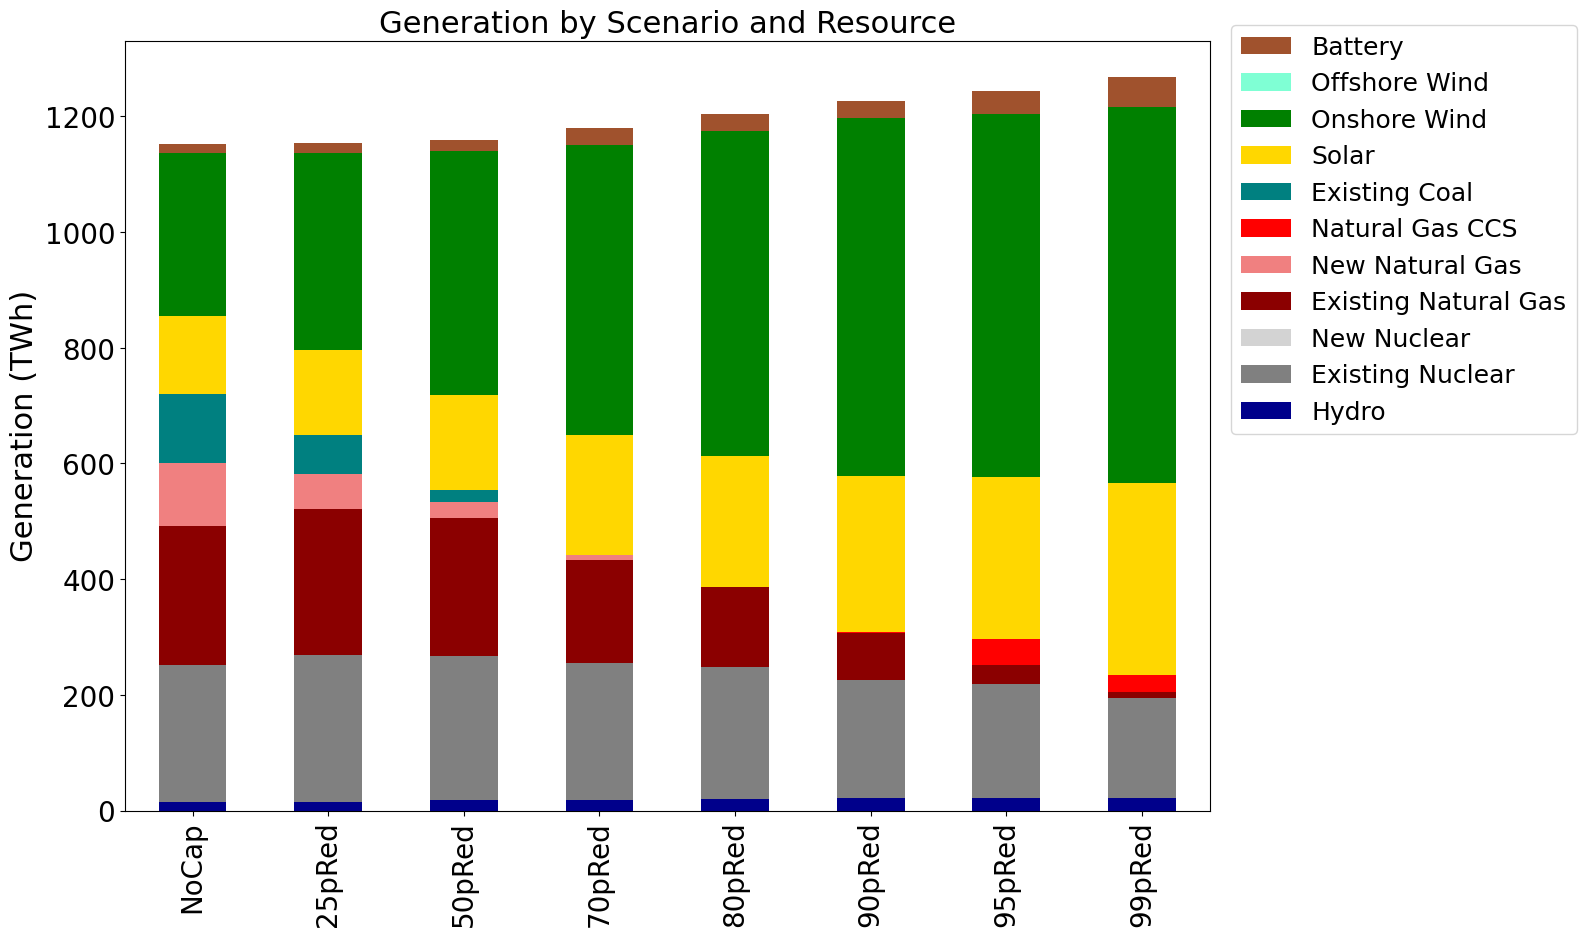

In [113]:
# by scenario
total_gen = pd.DataFrame(columns = scenario_labels)

resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'solar|pv','landbasedwind|onshore_wind', 'offshorewind', 'battery']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind', 'Battery']
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind', 'Battery']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'aquamarine', 'sienna']


for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'power.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index','AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['index'])['AnnualSum'].sum()
    total_gen[scenario_labels[i]] = locals()[scenarios[i]]

total_gen = total_gen.T
total_gen = total_gen[resource_order]/1000000
total_gen.plot(kind='bar', stacked=True, color = color, figsize = (14,10))
plt.title('Generation by Scenario and Resource', fontsize = 22)
plt.ylabel('Generation (TWh)', fontsize = 22)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.ylim(0,300)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)


In [114]:
# by scenario
regional_gen = pd.DataFrame(columns = scenario_labels)


for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'power.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index', 'Zone', 'AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'index'])['AnnualSum'].sum()
    regional_gen[scenario_labels[i]] = locals()[scenarios[i]]


regional_gen.reset_index(inplace=True)

regional_gen


,Zone,index,NoCap,25pRed,50pRed,70pRed,80pRed,90pRed,95pRed,99pRed
0,0.0,Total,1152807700.0,1153462500.0,1160007800.0,1179952300.0,1204664000.0,1226409900.0,1243232300.0,1267894400.0
1,1.0,Battery,3823418.8,4367672.5,3789812.8,3107235.2,2221614.8,154602.83,1029541.4,1757250.1
2,1.0,Existing Coal,30125116.0,15236381.0,5734731.5,497.148,137.74016,1120.7147,15.569977,5.391046
3,1.0,Existing Natural Gas,3820609.643,4129984.228,5061224.4852,3913594.85,2734288.3905,1205919.1959,154543.21931,28675.472831
4,1.0,Hydro,2874594.277,2864486.277,2846944.477,2792936.777,2730684.077,2596173.777,2627218.477,2619724.777
...,...,...,...,...,...,...,...,...,...,...
103,11.0,New Natural Gas,1443467.3332,7786.8884,2895.88093,1573.79121,673.4749,6923.7276,99.328044,38.508851
104,11.0,New Nuclear,595.24286,338.81808,260.20062,370.59766,255.16206,11216.266,318.1719,524.4807
105,11.0,Offshore Wind,100.80108,75.96661,37.70847,63.23256,45.46122,1182.8977,37.539246,41.768143
106,11.0,Onshore Wind,54107.798,4679707.26213,33843874.44653,57994970.31175,50362738.89497,58595122.217,59546500.69152,41376120.45515


In [115]:
sub_regional_gen = regional_gen[regional_gen.Zone == 11.0].iloc[:, 1:]

#sub_regional_gen

sub_regional_gen = sub_regional_gen.T


sub_regional_gen.set_axis(sub_regional_gen.iloc[0], axis=1, inplace=True)
sub_regional_gen = sub_regional_gen[1:]


/var/folders/jb/2sqt8fd5643gdpy3ptb304_80000gr/T/ipykernel_67122/252402267.py:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sub_regional_gen.set_axis(sub_regional_gen.iloc[0], axis=1, inplace=True)


In [116]:
sub_regional_gen

index,Battery,Existing Coal,Existing Natural Gas,Existing Nuclear,Hydro,Natural Gas CCS,New Natural Gas,New Nuclear,Offshore Wind,Onshore Wind,Solar
NoCap,3769139.5,651022.0,53576691.4,74230115.0,2913607.2777,795.5363,1443467.3332,595.24286,100.80108,54107.798,38424152.525668
25pRed,3891250.8,200761.58,54320001.54,73997186.0,3014195.5777,554.9235,7786.8884,338.81808,75.96661,4679707.26213,40063840.878695
50pRed,3563770.8,670.3401,41763958.94,72821146.0,3666758.3777,361.94485,2895.88093,260.20062,37.70847,33843874.44653,39887374.44884
70pRed,4347875.5,195.39911,29364685.13,68733631.0,3962324.7777,488.46368,1573.79121,370.59766,63.23256,57994970.31175,42490116.164376
80pRed,3888645.0,84.91494,23900579.24,66112439.0,4274378.1777,341.4238,673.4749,255.16206,45.46122,50362738.89497,38580789.914659
90pRed,3409801.2,882.54785,14601438.7815,59465283.5,4993958.9777,28000.482,6923.7276,11216.266,1182.8977,58595122.217,41298686.92396
95pRed,6933507.5,12.719109,7797088.69878,57359150.5,4905176.5777,5624227.5,99.328044,318.1719,37.539246,59546500.69152,51299569.631905
99pRed,9859067.0,4.550317,5797643.208342,56173674.5,4960903.9777,9302275.0,38.508851,524.4807,41.768143,41376120.45515,64363600.768024


In [117]:
sub_regional_gen = sub_regional_gen.drop('Battery', axis=1)

### H2G2P Generation ###

In [118]:
os.chdir("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_IES_Simulations/Consolidated_Results/HSC_Results/")
directory = Path.cwd()

regional_g2p_gen = pd.DataFrame(columns = scenario_labels)


resource_abr = ['CCGT-H2', 'OCGT-H2']

resource_name = ['CCGT-H2', 'OCGT-H2']

resource_order = ['CCGT-H2', 'OCGT-H2']

color = ['skyblue', 'steelblue']

for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'HSC_G2P_power_generation.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index', 'Zone', 'AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'index'])['AnnualSum'].sum()
    regional_g2p_gen[scenario_labels[i]] = locals()[scenarios[i]]


In [119]:
regional_g2p_gen

NoCap     25pRed      50pRed     70pRed     80pRed  \
Zone index                                                             
1.0  CCGT-H2  250.61661  204.19727  102.264145  104.85016  61.161224   
     OCGT-H2  287.02725  172.36298    83.72964   102.8213  58.444515   
2.0  CCGT-H2  231.75952  184.95094    94.76859   94.42389  47.119495   
     OCGT-H2  234.95386  157.49597    77.49341   91.70453  47.259586   
3.0  CCGT-H2  391.50098  250.67812    119.6758  117.28888   54.61434   
     OCGT-H2  2691.3845  394.27957   106.46521  113.96375  55.887104   
4.0  CCGT-H2  262.82553  207.79033    107.3618  114.33563   57.53612   
     OCGT-H2  302.36102  175.48785    88.24829  111.61162   54.10812   
5.0  CCGT-H2  194.52759  154.19244   75.024185  70.699715   42.10282   
     OCGT-H2  205.19023  132.61754   63.061058   75.17753   43.91294   
6.0  CCGT-H2  298.22058  236.39899   119.98093  116.15436  57.589245   
     OCGT-H2  340.10876  202.39363    94.63374  110.30188   52.76516   
7.0  CCGT-H2   265.3416  210.25893  109.416176  117.10192  55.140537   
     OCGT-H2  318.02084  175.75969    89.07853  120.78527   51.91123   
8.0  CCGT-H2  237.16632  185.50533    89.83236   91.46749  46.180584   
     OCGT-H2  234.09837  154.17029   73.146545  92.524254   45.91189   
9.0  CCGT-H2  229.97095  187.86902  100.845726   96.29584  46.489952   
     OCGT-H2  236.68817   157.3684    80.23769   99.49432   47.33256   
10.0 CCGT-H2  237.96344   190.1843   102.44949  107.71348  57.896225   
     OCGT-H2  253.72661  160.77882   85.997536  104.42041  54.768227   
11.0 CCGT-H2  270.28592  201.79683    95.79507   93.67624  49.481377   
     OCGT-H2    384.643  175.14685    78.28625  90.921074  46.804726   

                 90pRed     95pRed     99pRed  
Zone index                                     
1.0  CCGT-H2   6222.294  1814.4553  2453369.5  
     OCGT-H2   5338.922  480.56305  414.78757  
2.0  CCGT-H2  5561.6484   7365.914  1487169.2  
     OCGT-H2   5009.218  399.37985   371.9204  
3.0  CCGT-H2   9140.643  74526.914  1305743.0  
     OCGT-H2   6485.891  425.29953  361.73157  
4.0  CCGT-H2   6720.401  24062.656  747675.25  
     OCGT-H2  5518.1426  455.98856  415.75668  
5.0  CCGT-H2   4429.949   376.5963  228901.61  
     OCGT-H2  3981.6692  219.30444  421.05603  
6.0  CCGT-H2   6613.918   70910.23  3186130.0  
     OCGT-H2   5295.847   744.6535  394.38513  
7.0  CCGT-H2   6180.732    12152.4   727893.7  
     OCGT-H2   5246.813  441.09064  414.53647  
8.0  CCGT-H2   4805.954  344.54718  2524.5981  
     OCGT-H2  4127.0005   219.6233   356.6939  
9.0  CCGT-H2   5085.639  12302.653  823262.44  
     OCGT-H2  4767.2134  422.80038  397.06802  
10.0 CCGT-H2   6235.647  1324.2609   783218.6  
     OCGT-H2   5068.723   424.2998  392.21036  
11.0 CCGT-H2  6525.1187  19162.834  1188741.0  
     OCGT-H2   5303.977   421.1797  352.84195

In [120]:
regional_g2p_gen.reset_index(inplace=True)

In [121]:
sub_regional_g2p_gen = regional_g2p_gen[regional_g2p_gen.Zone == 11.0].iloc[:, 1:]
sub_regional_g2p_gen = sub_regional_g2p_gen.T

In [122]:
sub_regional_g2p_gen

,20,21
index,CCGT-H2,OCGT-H2
NoCap,270.28592,384.643
25pRed,201.79683,175.14685
50pRed,95.79507,78.28625
70pRed,93.67624,90.921074
80pRed,49.481377,46.804726
90pRed,6525.1187,5303.977
95pRed,19162.834,421.1797
99pRed,1188741.0,352.84195


In [123]:
sub_regional_g2p_gen.set_axis(sub_regional_g2p_gen.iloc[0], axis=1, inplace=True)
sub_regional_g2p_gen = sub_regional_g2p_gen[1:]


/var/folders/jb/2sqt8fd5643gdpy3ptb304_80000gr/T/ipykernel_67122/1771396385.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sub_regional_g2p_gen.set_axis(sub_regional_g2p_gen.iloc[0], axis=1, inplace=True)


In [124]:
sub_regional_g2p_gen

index,CCGT-H2,OCGT-H2
NoCap,270.28592,384.643
25pRed,201.79683,175.14685
50pRed,95.79507,78.28625
70pRed,93.67624,90.921074
80pRed,49.481377,46.804726
90pRed,6525.1187,5303.977
95pRed,19162.834,421.1797
99pRed,1188741.0,352.84195


In [125]:
sub_regional_gen = pd.concat([sub_regional_gen, sub_regional_g2p_gen], axis = 1)

In [126]:
sub_regional_gen

index,Existing Coal,Existing Natural Gas,Existing Nuclear,Hydro,Natural Gas CCS,New Natural Gas,New Nuclear,Offshore Wind,Onshore Wind,Solar,CCGT-H2,OCGT-H2
NoCap,651022.0,53576691.4,74230115.0,2913607.2777,795.5363,1443467.3332,595.24286,100.80108,54107.798,38424152.525668,270.28592,384.643
25pRed,200761.58,54320001.54,73997186.0,3014195.5777,554.9235,7786.8884,338.81808,75.96661,4679707.26213,40063840.878695,201.79683,175.14685
50pRed,670.3401,41763958.94,72821146.0,3666758.3777,361.94485,2895.88093,260.20062,37.70847,33843874.44653,39887374.44884,95.79507,78.28625
70pRed,195.39911,29364685.13,68733631.0,3962324.7777,488.46368,1573.79121,370.59766,63.23256,57994970.31175,42490116.164376,93.67624,90.921074
80pRed,84.91494,23900579.24,66112439.0,4274378.1777,341.4238,673.4749,255.16206,45.46122,50362738.89497,38580789.914659,49.481377,46.804726
90pRed,882.54785,14601438.7815,59465283.5,4993958.9777,28000.482,6923.7276,11216.266,1182.8977,58595122.217,41298686.92396,6525.1187,5303.977
95pRed,12.719109,7797088.69878,57359150.5,4905176.5777,5624227.5,99.328044,318.1719,37.539246,59546500.69152,51299569.631905,19162.834,421.1797
99pRed,4.550317,5797643.208342,56173674.5,4960903.9777,9302275.0,38.508851,524.4807,41.768143,41376120.45515,64363600.768024,1188741.0,352.84195


In [127]:
#sub_regional_gen['Existing Nuclear'] = 0

In [128]:
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Onshore Wind', 'Offshore Wind', 'CCGT-H2', 'OCGT-H2']
#color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green']

sub_regional_gen = sub_regional_gen[resource_order]/1000000

In [129]:
sub_regional_pow_bal

Source,Generation,Demand,Storage Charge,Storage Discharge,Transmission Net Export
NoCap,170.016381,-193.623664,-6.15761,5.047416,24.751252
25pRed,174.905348,-193.623664,-6.436329,5.270356,19.91774
50pRed,189.955021,-193.623664,-6.920425,5.596092,5.02624
70pRed,200.213792,-193.623664,-8.249924,6.682504,-4.988307
80pRed,180.577755,-193.623664,-8.133972,6.543217,15.294578
90pRed,175.601776,-193.623664,-8.563415,6.810719,20.970487
95pRed,183.218329,-193.623664,-12.610485,10.247355,14.272415
99pRed,178.620562,-193.623664,-16.120851,13.213331,19.771525


In [130]:
zonal_analysis = pd.concat([sub_regional_gen, sub_regional_pow_bal[['Demand', 'Storage Charge', 'Storage Discharge', 'Transmission Net Export']]], axis = 1)

In [131]:
zonal_analysis

,Hydro,Existing Nuclear,New Nuclear,Existing Natural Gas,New Natural Gas,Natural Gas CCS,Existing Coal,Solar,Onshore Wind,Offshore Wind,CCGT-H2,OCGT-H2,Demand,Storage Charge,Storage Discharge,Transmission Net Export
NoCap,2.913607,74.230115,0.000595,53.576691,1.443467,0.000796,0.651022,38.424153,0.054108,0.000101,0.00027,0.000385,-193.623664,-6.15761,5.047416,24.751252
25pRed,3.014196,73.997186,0.000339,54.320002,0.007787,0.000555,0.200762,40.063841,4.679707,0.000076,0.000202,0.000175,-193.623664,-6.436329,5.270356,19.91774
50pRed,3.666758,72.821146,0.00026,41.763959,0.002896,0.000362,0.00067,39.887374,33.843874,0.000038,0.000096,0.000078,-193.623664,-6.920425,5.596092,5.02624
70pRed,3.962325,68.733631,0.000371,29.364685,0.001574,0.000488,0.000195,42.490116,57.99497,0.000063,0.000094,0.000091,-193.623664,-8.249924,6.682504,-4.988307
80pRed,4.274378,66.112439,0.000255,23.900579,0.000673,0.000341,0.000085,38.58079,50.362739,0.000045,0.000049,0.000047,-193.623664,-8.133972,6.543217,15.294578
90pRed,4.993959,59.465283,0.011216,14.601439,0.006924,0.028,0.000883,41.298687,58.595122,0.001183,0.006525,0.005304,-193.623664,-8.563415,6.810719,20.970487
95pRed,4.905177,57.35915,0.000318,7.797089,0.000099,5.624227,0.000013,51.29957,59.546501,0.000038,0.019163,0.000421,-193.623664,-12.610485,10.247355,14.272415
99pRed,4.960904,56.173674,0.000524,5.797643,0.000039,9.302275,0.000005,64.363601,41.37612,0.000042,1.188741,0.000353,-193.623664,-16.120851,13.213331,19.771525


In [132]:
zonal_analysis.columns

Index(['Hydro', 'Existing Nuclear', 'New Nuclear', 'Existing Natural Gas',
       'New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar',
       'Onshore Wind', 'Offshore Wind', 'CCGT-H2', 'OCGT-H2', 'Demand',
       'Storage Charge', 'Storage Discharge', 'Transmission Net Export'],
      dtype='object')

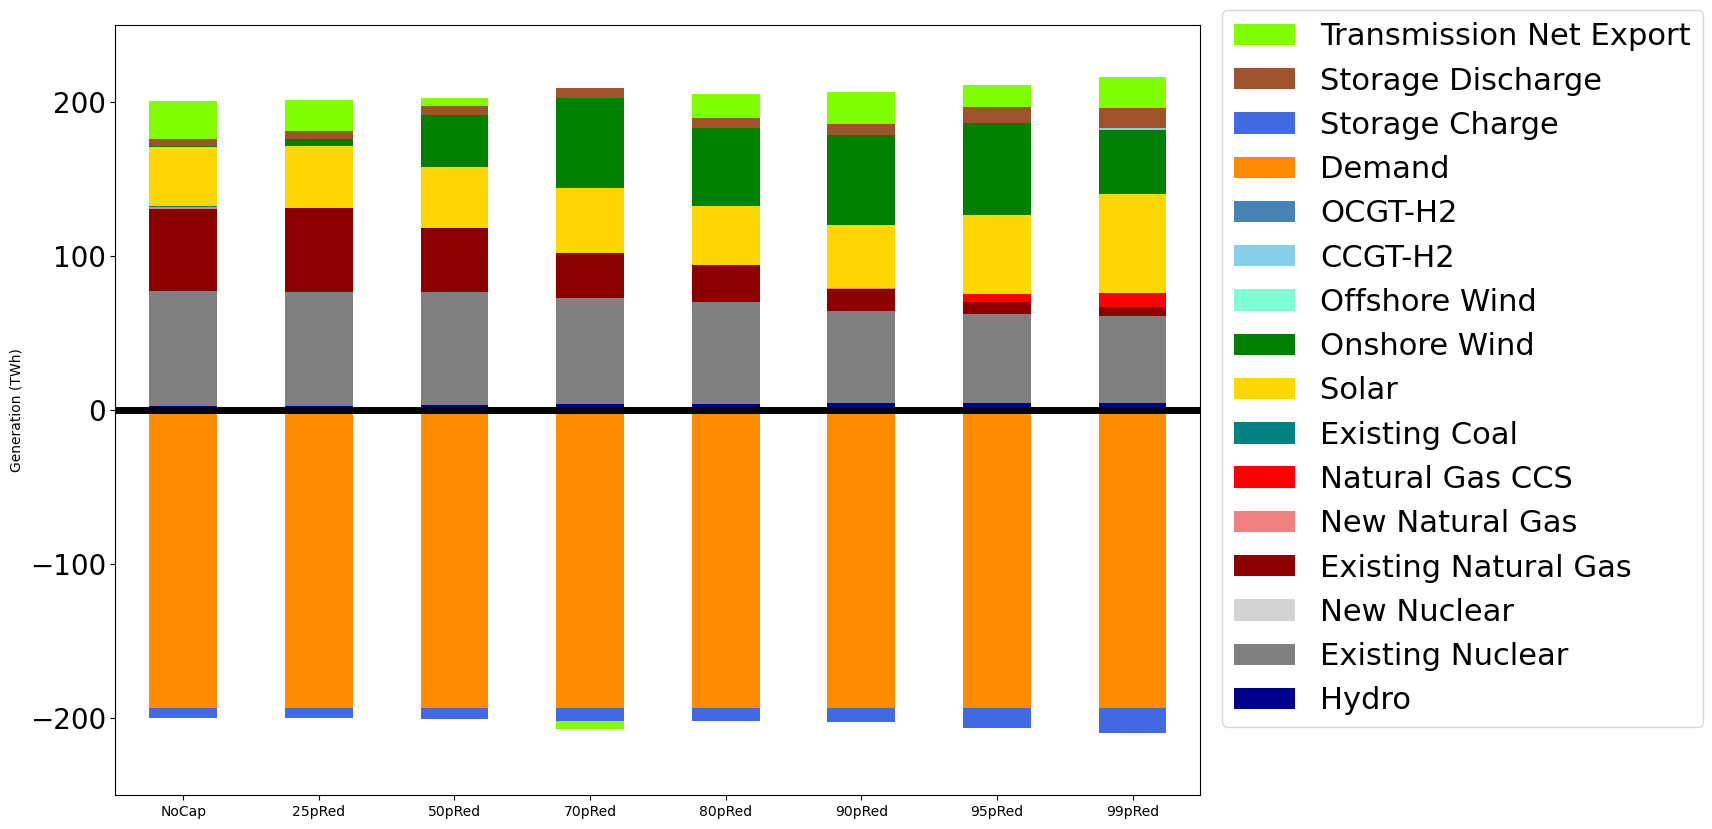

In [133]:
#color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green']
color = ['darkblue','gray','lightgray','darkred','lightcoral', 'red', 'teal', 'gold','green', 'aquamarine', 'skyblue', 'steelblue', 'darkorange', 'royalblue', 'sienna', 'chartreuse']

zonal_analysis.plot(kind='bar', stacked=True, color = color, figsize = (14,10), legend = True)
#plt.title('Generation by Scenario and Resource', fontsize = 22)
plt.ylabel('Generation (TWh)', fontsize = 10)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 20)
plt.axhline(y = 0.0, color = 'k', linestyle = '-', linewidth = 5)
plt.ylim(-250,250)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 22)

### Computing Curtailment by Region and Scenario ### 

In [ ]:
# by scenario
regional_curtail = pd.DataFrame(columns = scenario_labels)


In [ ]:
for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'curtail.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    for x in range(len(resource_abr)):
        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index', 'AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['index'])['AnnualSum'].sum()
    regional_curtail[scenario_labels[i]] = locals()[scenarios[i]]


In [ ]:
regional_curtail

In [ ]:
#for i in range(len(scenarios)):
#    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'curtail.csv')
#    locals()[scenarios[i]] = locals()[scenarios[i]].T
#    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
#    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
#    locals()[scenarios[i]].columns = new_header
#    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
#    for x in range(len(resource_abr)):
#        locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
#    locals()[scenarios[i]] = locals()[scenarios[i]][['index', 'Zone', 'AnnualSum']]
#    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'index'])['AnnualSum'].sum()
#    regional_curtail[scenario_labels[i]] = locals()[scenarios[i]]


In [ ]:
regional_curtail.reset_index(inplace=True)

In [ ]:
sub_regional_curtail = regional_curtail[regional_curtail.Zone == 11.0].iloc[:, 1:]

sub_regional_curtail = sub_regional_curtail.T

sub_regional_curtail


In [ ]:
sub_regional_curtail.set_axis(sub_regional_curtail.iloc[0], axis=1, inplace=True)
sub_regional_curtail = sub_regional_curtail[1:]

sub_regional_curtail


In [ ]:
sub_regional_curtail = sub_regional_curtail[['Solar', 'Wind']]
resource_order = ['Solar','Wind']
color = ['gold','green']
sub_regional_curtail = sub_regional_curtail[resource_order]/1000000

In [ ]:
sub_regional_curtail.plot(kind='bar', stacked=True, color = color, figsize = (14,10), legend = False)
#plt.title('Generation by Scenario and Resource', fontsize = 22)
plt.ylabel('Generation (TWh)', fontsize = 10)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 20)
plt.ylim(0,50)
#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)

## Computing System Cost of Electricity ## 

In [ ]:
costs = pd.read_csv( directory/ (scenarios[i]) / 'costs.csv')
cost_total = pd.DataFrame(index = costs.iloc[:,2:12].str.replace("c",""))

for i in range(len(scenarios)):
    cost_total[scenario_labels[i]] = list(pd.read_csv(directory/(scenarios[i]) / 'costs.csv').iloc[:,2:12])
    #cost_total[scenario_labels[i]] = list(pd.read_csv(directory/(scenarios[i]) / 'costs.csv'))
    #cost_total[scenario_labels[i]] = cost_total[scenario_labels[i]]/load_total

#cost_total = cost_total.drop(labels='Total', axis=0)

#cost_total = cost_total.T


In [ ]:
cost_total

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create a sample dataset
data = np.random.normal(size=100)

# create the box plot
fig, ax = plt.subplots()
ax.boxplot(data)

# set the plot title and axis labels
ax.set_title('Box plot of a random dataset')
ax.set_xlabel('Data')
ax.set_ylabel('Values')

# show the plot
plt.show()

In [ ]:
costs = pd.read_csv( directory/ (scenario_title +'_' + scenarios[i]) / 'Results/costs.csv')
cost_total = pd.DataFrame(index = costs.iloc[:,0].str.replace("c",""))
load = pd.read_csv(directory/ (scenario_title +'_' + scenarios[i]) / 'Load_data.csv')
load = load.iloc[:8760,9:]
load_total = load.sum().sum()

for i in range(len(scenarios)):
    cost_total[scenario_labels[i]] = list(pd.read_csv(directory / (scenario_title +'_' + scenarios[i]) / 'Results/costs.csv').iloc[:,1])
    cost_total[scenario_labels[i]] = cost_total[scenario_labels[i]]/load_total

cost_total = cost_total.drop(labels='Total', axis=0)

cost_total = cost_total.T
f, ax = plt.subplots(figsize=(14,10))
#brownfield.plot(kind='bar', stacked=True, ax = ax, color = color)
cost_total.plot(kind='bar', stacked=True, ax = ax)
ax.set_xticklabels(scenario_labels, rotation = 0)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 0.98), loc='upper left', borderaxespad=0)
'''for x,y in zip(scenario_labels,cost_total.sum(axis=1)):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center'''
plt.xlabel('Scenario')
plt.ylabel('SCOE ($/MWh)')
plt.ylim(0,100)
plt.show()

In [ ]:
costs = pd.read_csv(directory/(scenarios[i]) / 'costs.csv')

In [ ]:
costs

In [ ]:
costs = pd.read_csv( directory/ (scenarios[i]) / 'costs.csv')

In [ ]:
cost_total = pd.DataFrame(index = costs.iloc[:,0].str.replace("c",""))

In [ ]:
load_data = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_NoCap/TDR_Results/Load_data.csv")
load_data = load_data.iloc[:,9:]
time_weights = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_NoCap/Results/time_weights.csv")
load_data = load_data.multiply(time_weights.Weight, axis = "index")

agg_load = load_data.sum(axis = 0)

agg_load = agg_load.sum()
#agg_load = agg_load/1000000

In [ ]:
agg_load

In [ ]:
for i in range(len(scenarios)):
    cost_total[scenario_labels[i]] = list(pd.read_csv(directory / (scenarios[i]) / 'costs.csv').iloc[:,1])
    cost_total[scenario_labels[i]] = cost_total[scenario_labels[i]]/agg_load


In [ ]:
cost_total

In [ ]:
cost_total = cost_total.drop(labels='Total', axis=0)

In [ ]:
cost_total = cost_total.T
f, ax = plt.subplots(figsize=(14,10))

cost_total.plot(kind='bar', stacked=True, ax = ax)
ax.set_xticklabels(scenario_labels, rotation = 0)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 0.98), loc='upper left', borderaxespad=0, fontsize = 22)
plt.xlabel('Scenario', fontsize = 22)
plt.ylabel('SCOE ($/MWh)', fontsize = 22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.ylim(0,50)
plt.show()

The differences in the total generation is as a result of storage which has not been plotted here

## Computing Levelized Cost of Electricity ## 

**The Script is for computing the Levelized Cost of Electricity** 

In [ ]:
gendat = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Simulations_with_EMAC/Simulations_with_EMAC_95pRed_withMoreSolarandWind/Generators_data.csv")

In [ ]:
gendat = gendat[['Resource', 'Zone', 'Inv_Cost_per_MWyr', 'Fixed_OM_Cost_per_MWyr', 'Var_OM_Cost_per_MWh', 'Heat_Rate_MMBTU_per_MWh', 'Fuel']]

Reading in the fuel data 

In [ ]:
fuel = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Simulations_with_EMAC/Simulations_with_EMAC_95pRed_withMoreSolarandWind/Fuels_data.csv")

In [ ]:
fuel = fuel.iloc[1, 1:]

In [ ]:
gendat['Fuel'] = gendat['Fuel'].map(fuel)

Compute Capacity Factors 

In [ ]:
capacity = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Simulations_with_EMAC/Simulations_with_EMAC_95pRed_withMoreSolarandWind/Results/capacity.csv")

In [ ]:
generation = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Simulations_with_EMAC/Simulations_with_EMAC_95pRed_withMoreSolarandWind/Results/power.csv")

In [ ]:
generation = generation.iloc[1, 1:-1]

In [ ]:
generation = pd.DataFrame(generation)

In [ ]:
generation.rename(columns = {1:'Generation'}, inplace=True)

In [ ]:
generation = generation.reset_index()

In [ ]:
generation = generation.rename(columns = {'index':'Resource'})

In [ ]:
capacity = pd.merge(capacity, generation, on = 'Resource')

In [ ]:
gendat = pd.merge(gendat, capacity[['Resource', 'EndCap', 'Generation']], on = 'Resource')

Convert capacity to GW and convert generation to TWh 

In [ ]:
gendat.EndCap = gendat.EndCap/1000 # Convert from MW to GW 

In [ ]:
gendat.Generation = gendat.Generation/1000000 # convert from MWh to TWh 

In [ ]:
gendat.tail(5)

Compute the Capacity Factors 

In [ ]:
gendat['CapacityFactor'] = (gendat.Generation/(gendat.EndCap * 8760)) * 1000 

In [ ]:
gendat.tail(5)

In [ ]:
gendat['LCOE'] = (gendat.Inv_Cost_per_MWyr + gendat.Fixed_OM_Cost_per_MWyr)/(8760 * gendat.CapacityFactor) + gendat.Var_OM_Cost_per_MWh + (gendat.Heat_Rate_MMBTU_per_MWh * gendat.Fuel)

In [ ]:
gendat.CapacityFactor = gendat.CapacityFactor * 100 

In [ ]:
gendat.to_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Simulations_with_EMAC/Simulations_with_EMAC_95pRed_withMoreSolarandWind/with_capFactors.csv", index=False)

In [ ]:
#gendat = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Power_Systems_Only/NoCap/Generators_data.csv")

In [ ]:
gendat.columns

In [ ]:
gendat = gendat[['Resource', 'Zone', 'Inv_Cost_per_MWyr', 'Fixed_OM_Cost_per_MWyr', 'Var_OM_Cost_per_MWh', 'Heat_Rate_MMBTU_per_MWh', 'Fuel']]

In [ ]:
gendat.shape

Reading in fuel data 

In [ ]:
fuel = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Power_Systems_Only/NoCap/Fuels_data.csv")

In [ ]:
fuel.head(5)

In [ ]:
fuel = fuel.iloc[1, 1:]

In [ ]:
type(fuel)

In [ ]:
fuel 

In [ ]:
gendat['Fuel'] = gendat['Fuel'].map(fuel)

In [ ]:
gendat.head(5)

In [ ]:
gendat.head(20)

Compute Capacity Factors 

In [ ]:
capacity = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Power_Systems_Only/NoCap/Results/capacity.csv")

In [ ]:
capacity.head(5)

In [ ]:
generation = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/Power_Systems_Only/NoCap/Results/power.csv")

In [ ]:
generation.head(5)

In [ ]:
generation.shape 

In [ ]:
generation = generation.iloc[1, 1:-1]

In [ ]:
generation = pd.DataFrame(generation)

In [ ]:
generation.head(5)

In [ ]:
generation.columns

In [ ]:
generation.rename(columns = {1:'Generation'}, inplace=True)

In [ ]:
generation.head(5)

In [ ]:
generation = generation.reset_index()

In [ ]:
generation = generation.rename(columns = {'index':'Resource'})

In [ ]:
generation.head(5)

In [ ]:
capacity.head(5)

In [ ]:
capacity = pd.merge(capacity, generation, on = 'Resource')

In [ ]:
capacity.head(5)

In [ ]:
gendat.head(5)

In [ ]:
gendat = pd.merge(gendat, capacity[['Resource', 'EndCap', 'Generation']], on = 'Resource')

In [ ]:
gendat.head(5)

In [ ]:
gendat['CapacityFactor'] = gendat.Generation/(gendat.EndCap*8760)

In [ ]:
gendat.head(5)

In [ ]:
gendat['LCOE'] = (gendat.Inv_Cost_per_MWyr + gendat.Fixed_OM_Cost_per_MWyr)/(8760 * gendat.CapacityFactor) + gendat.Var_OM_Cost_per_MWh + gendat.Heat_Rate_MMBTU_per_MWh * gendat.Fuel

In [ ]:
gendat.head(5)

In [ ]:
gendat.tail(50)

## Stacking Generation, Load, and Net Export on the same plot ## 

In [ ]:
power = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/All_PJM_Updated_Network/Simulations_with_EMAC_99pRed/Results/power.csv")

In [ ]:
pow_bal = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/All_PJM_Updated_Network/Simulations_with_EMAC_99pRed/Results/power_balance.csv")

In [ ]:
regions = ['MIS_INKY', 'PJM_WMAC', 'PJM_SMAC', 'PJM_West', 'PJM_AP', 'PJM_COMD', 'PJM_ATSI', 'PJM_Dom', 'PJM_PENE', 'S_C_KY', 'PJM_EMAC'] 

Apply the same treatment for displaying generation by source and region  

In [ ]:
power.drop(columns=power.columns[0], axis=1, inplace=True)
power = power.drop(['Total'],axis =1)

zone_series = {'Zone':power.iloc[0]}
zone_name = pd.DataFrame(zone_series)



In [ ]:
zone_name

In [ ]:
power.iloc[0] = np.where(zone_name.Zone == 1.0, 'MIS_INKY',
                           np.where(zone_name.Zone == 2.0, 'PJM_WMAC', 
                                   np.where(zone_name.Zone == 3.0, 'PJM_SMAC',
                                           np.where(zone_name.Zone == 4.0, 'PJM_West',
                                                   np.where(zone_name.Zone == 5.0, 'PJM_AP',
                                                           np.where(zone_name.Zone == 6.0, 'PJM_COMD',
                                                                   np.where(zone_name.Zone == 7, 'PJM_ATSI',
                                                                           np.where(zone_name.Zone == 8.0, 'PJM_Dom', 
                                                                                   np.where(zone_name.Zone == 9.0, 'PJM_PENE', 
                                                                                           np.where(zone_name.Zone == 10.0, 'S_C_KY',
                                                                                                    np.where(zone_name.Zone == 11.0, 'PJM_EMAC', None)))))))))))

In [ ]:
resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'solar|pv','wind']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Existing Coal', 'Solar','Wind']
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Wind']


In [ ]:
gen = power.iloc[:2]
gen = gen.T

In [ ]:
gen.head(5)

In [ ]:
for i in range(len(resource_abr)):
    gen.loc[gen.index.str.contains(resource_abr[i]), 'Resource'] = resource_name[i]
gen = gen.rename(columns = {0:'Zone',1:'Generation'})
gen['Generation'] = gen['Generation']/1000000
gen = gen[(gen[['Generation']] != 0).all(axis=1)]
gen = gen[(gen[['Resource']] != 'Total').all(axis=1)]
agg_gen = gen.groupby(['Zone', 'Resource'])['Generation'].sum().unstack().fillna(0)
agg_gen = agg_gen.reindex(columns=resource_order)
agg_gen = agg_gen.reindex(index=regions)

In [ ]:
agg_gen

**Working on Power Balance**

In [ ]:
pow_bal.head(5)

In [ ]:
pow_bal.drop(columns=pow_bal.columns[0], axis = 1, inplace=True)

In [ ]:
zone_series = {'Zone':pow_bal.iloc[0]}
zone_name = pd.DataFrame(zone_series)


In [ ]:
zone_name

In [ ]:
pow_bal.iloc[0] = np.where(zone_name.Zone == 1.0, 'MIS_INKY',
                           np.where(zone_name.Zone == 2.0, 'PJM_WMAC', 
                                   np.where(zone_name.Zone == 3.0, 'PJM_SMAC',
                                           np.where(zone_name.Zone == 4.0, 'PJM_West',
                                                   np.where(zone_name.Zone == 5.0, 'PJM_AP',
                                                           np.where(zone_name.Zone == 6.0, 'PJM_COMD',
                                                                   np.where(zone_name.Zone == 7, 'PJM_ATSI',
                                                                           np.where(zone_name.Zone == 8.0, 'PJM_Dom', 
                                                                                   np.where(zone_name.Zone == 9.0, 'PJM_PENE', 
                                                                                           np.where(zone_name.Zone == 10.0, 'S_C_KY',
                                                                                                    np.where(zone_name.Zone == 11.0, 'PJM_EMAC', None)))))))))))

In [ ]:
pow_bal.head(5)

In [ ]:
gen_bal = pow_bal.iloc[:2]
gen_bal = gen_bal.T

In [ ]:
gen_bal.head(20)

In [ ]:
pow_bal_abr = ['Generation', 'Storage_Discharge', 'Storage_Charge', 'Transmission_NetExport', 'Demand']
pow_bal_name = ['Generation', 'Storage Discharge','Storage Charge', 'Transmission Net Export', 'Demand']
pow_bal_order = ['Generation', 'Storage Discharge', 'Storage Charge', 'Transmission Net Export', 'Demand']


In [ ]:
for i in range(len(pow_bal_abr)):
    gen_bal.loc[gen_bal.index.str.contains(pow_bal_abr[i]), 'Source'] = pow_bal_name[i]


In [ ]:
gen_bal.head(15)

In [ ]:
gen_bal = gen_bal.rename(columns = {0:'Zone',1:'Net_Power'})
gen_bal['Net_Power'] = gen_bal['Net_Power']/1000000

In [ ]:
gen_bal = gen_bal[(gen_bal[['Net_Power']] != 0).all(axis=1)]

In [ ]:
gen_bal = gen_bal[(gen_bal[['Source']] != 'Total').all(axis=1)]

In [ ]:
gen_bal.head(15)

In [ ]:
agg_gen_bal = gen_bal.groupby(['Zone', 'Source'])['Net_Power'].sum().unstack().fillna(0)

In [ ]:
agg_gen_bal = agg_gen_bal.reindex(columns=pow_bal_order)
agg_gen_bal = agg_gen_bal.reindex(index=regions)


In [ ]:
agg_gen_bal

In [ ]:
agg_gen_bal[['Transmission_Import', 'Transmission_Export']] = agg_gen_bal['Transmission Net Export'].apply(lambda x: pd.Series([x if x > 0 else 0, x if x < 0 else 0]))

In [ ]:
agg_gen_bal

In [ ]:
agg_gen_bal = agg_gen_bal[['Generation', 'Demand', 'Transmission_Import', 'Transmission_Export', 'Storage Discharge', 'Storage Charge']]

In [ ]:
agg_gen_bal

In [ ]:
zonal_analysis = pd.concat([agg_gen, agg_gen_bal], axis = 1)

In [ ]:
zonal_analysis.columns

In [ ]:
zonal_analysis.drop(columns='Generation', axis = 1, inplace=True)

In [ ]:
zonal_analysis.head(5)

In [ ]:
 
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar', 'Wind', 'Demand', 'Transmission_Import', 'Transmission_Export', 'Storage Discharge', 'Storage Charge']


color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green', 'darkorange', 'chartreuse', 'chartreuse', 'royalblue', 'sienna']

zonal_analysis.plot(kind='bar', stacked=True, color =  color, figsize = (14,10))
zonal_analysis = zonal_analysis.reindex(columns=resource_order)
plt.title('Net Power Balance by Zone and Resource', fontsize = 20)
plt.ylabel('Power Balance (TWh)', fontsize = 22)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
#plt.ylim(0,300)
plt.axhline(y = 0.0, color = 'k', linestyle = '-', linewidth = 5)
handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)
plt.legend(handles[::1], labels[::1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)

## Load curves across diffferent scenarios ##

In [ ]:
load_data = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/TDR_Results/Load_data.csv")
load_data = load_data.iloc[:,9:]



In [ ]:
load_data.head(5)

In [ ]:
time_weights = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Results/time_weights.csv")


In [ ]:
time_weights.head(5)

In [ ]:
load_data = load_data.multiply(time_weights.Weight, axis = "index")

In [ ]:
power = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Results/power.csv")

In [ ]:
power.drop(columns=power.columns[0], axis=1, inplace=True)
power = power.drop(['Total'],axis =1)

In [ ]:
power.head(5)

In [ ]:
gen = power.iloc[2:,:]/1000

In [ ]:
# Reset the index
gen = gen.reset_index(drop = True)

In [ ]:
gen = gen.multiply(time_weights.Weight, axis = "index")

In [ ]:
storage = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Results/storage.csv")

In [ ]:
#storage
storage = storage.iloc[1:,1:].loc[:, (storage != 0).any(axis=0)]/(-1000)

In [ ]:
storage = storage.reset_index(drop = True)
storage = storage.multiply(time_weights.Weight, axis = "index")

In [ ]:
charge = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Results/charge.csv")
charge = charge.iloc[2:]['Total'].reset_index(drop = True)/1000

In [ ]:
charge = charge.multiply(time_weights.Weight, axis = "index")

In [ ]:
charge.head(5)

In [ ]:
power_balance = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Results/power_balance.csv")

In [ ]:
power_balance.head(5)

In [ ]:
demand = power_balance.loc[2:,power_balance.columns.str.contains('Demand')].reset_index(drop=True)/1000

In [ ]:
demand = demand.multiply(time_weights.Weight, axis = "index")

In [ ]:
demand.head(5)

In [ ]:
## set week
week = 8

# sort resources by resource category for generators (from power.csv) and storage (from storage.csv)
#resource_abr = ['hydroelectric','bio or geothermal','nuclear(?!.*mid)','nuclear_mid','natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'battery','solar|pv','wind']
#resource_name = ['Hydro','Geothermal and Biomass','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Coal', 'Battery','Solar','Wind']
#color = ['darkblue','darkorange','gray','lightgray','darkred','lightcoral','red', 'teal', 'sienna','gold','green']

resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'coal', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'wind', 'solar|pv', 'battery']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Coal', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Wind', 'Solar', 'Battery']

color = ['darkblue','gray','lightgray','teal', 'darkred','lightcoral','red', 'green', 'gold', 'sienna']



#gen = power.iloc[2:,:]/1000
gendf = pd.DataFrame()
storagedf = pd.DataFrame()
for i in range(len(resource_abr)):
    gendf[resource_name[i]] = gen.loc[:, gen.columns.str.contains(resource_abr[i])].sum(axis=1)
    storagedf[resource_name[i]] = storage.loc[:, storage.columns.str.contains(resource_abr[i])].sum(axis=1)/1000

# plot dispatch profile
f, ax = plt.subplots(figsize=(12,8)) 
weekgen = gendf.iloc[(week-1)*168:week*168].reset_index(drop=True)
plt.stackplot(weekgen.index,weekgen['Hydro'],weekgen['Existing Nuclear'],weekgen['New Nuclear'], weekgen['Existing Coal'], weekgen['Existing Natural Gas'], weekgen['New Natural Gas'],weekgen['Natural Gas CCS'], weekgen['Wind'], weekgen['Solar'], weekgen['Battery'], colors = color)
#plt.stackplot(weekgen.index,weekgen['Hydro'],weekgen['Existing Nuclear'],weekgen['New Nuclear'],weekgen['Existing Natural Gas'],weekgen['New Natural Gas'],weekgen['Natural Gas CCS'], weekgen['Existing Coal'], weekgen['Solar'],weekgen['Wind'], colors = color)
for i in range(len(resource_name)):
    plt.plot([], [], color = color[i],label =resource_name[i])



# plot demand (from TDR load data) and demand + charge (from charge.csv)

#demand = power_balance.loc[2:,power_balance.columns.str.contains('Demand')].reset_index(drop=True)/1000
demand = -demand.loc[:, demand.any()].sum(axis=1).iloc[(week-1)*168:week*168].reset_index(drop = True)
#charge = #-power_balance.loc[2:,power_balance.columns.str.contains('Storage_Discharge')].sum(axis=1)/1000
plt.plot(demand.index,demand, color = 'black', label = 'Load')
plt.plot(demand.index,demand + charge.iloc[(week-1)*168:week*168].reset_index(drop=True), color = 'black', label = 'Load + charge', linestyle = '--')


# plot storage
#battery = (power_balance.loc[2:,power_balance.columns.str.contains('Storage_Discharge')].sum(axis=1)/1000).iloc[(week-1)*168:week*168].reset_index(drop=True)
#plt.stackplot(demand.index,battery, colors = 'goldenrod')
#battery_ch = (power_balance.loc[2:,power_balance.columns.str.contains('Storage_Charge')].sum(axis=1)/1000).iloc[(week-1)*168:week*168].reset_index(drop=True)
#plt.stackplot(demand.index,battery_ch, colors = 'red')

# figure settings
#plt.title('Reference Dispatch Profile (Week '+ str(week)+')')
plt.xlabel('Time (hr)')
plt.ylabel('Power (GW)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0)
plt.xlim(0,168)
#plt.ylim(0,190)
plt.show()

### Analyzing Power Curtailment ###

In [ ]:
curtail = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/All_PJM_Updated_Network/Simulations_with_EMAC_99pRed/Results/curtail.csv")

In [ ]:
curtail.drop(columns=curtail.columns[0], axis=1, inplace=True)
curtail = curtail.drop(['Total'],axis =1)

zone_series = {'Zone':curtail.iloc[0]}
zone_name = pd.DataFrame(zone_series)


In [ ]:
curtail

In [ ]:
curtail.iloc[0] = np.where(zone_name.Zone == 1.0, 'MIS_INKY',
                           np.where(zone_name.Zone == 2.0, 'PJM_WMAC', 
                                   np.where(zone_name.Zone == 3.0, 'PJM_SMAC',
                                           np.where(zone_name.Zone == 4.0, 'PJM_West',
                                                   np.where(zone_name.Zone == 5.0, 'PJM_AP',
                                                           np.where(zone_name.Zone == 6.0, 'PJM_COMD',
                                                                   np.where(zone_name.Zone == 7, 'PJM_ATSI',
                                                                           np.where(zone_name.Zone == 8.0, 'PJM_Dom', 
                                                                                   np.where(zone_name.Zone == 9.0, 'PJM_PENE', 
                                                                                           np.where(zone_name.Zone == 10.0, 'S_C_KY',
                                                                                                    np.where(zone_name.Zone == 11.0, 'PJM_EMAC', None)))))))))))

In [ ]:
#resource_abr = ['hydroelectric','natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs','nuclear_1|nuclear_2','nuclear_nuclear_moderate', 'solar|pv','wind']
#resource_name = ['Hydro','Existing Natural Gas','New Natural Gas','Natural Gas CCS','Existing Nuclear','New Nuclear', 'Solar','Wind']
#resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Solar','Wind']
#color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'gold','green']

resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'solar|pv','wind']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Existing Coal', 'Solar','Wind']
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Wind']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green']



gen_curtail = curtail.iloc[:2]
gen_curtail = gen_curtail.T
for i in range(len(resource_abr)):
    gen_curtail.loc[gen_curtail.index.str.contains(resource_abr[i]), 'Resource'] = resource_name[i]
gen_curtail = gen_curtail.rename(columns = {0:'Zone',1:'Curtailment'})
gen_curtail['Curtailment'] = gen_curtail['Curtailment']/1000000
gen_curtail = gen_curtail[(gen_curtail[['Curtailment']] != 0).all(axis=1)]
gen_curtail = gen_curtail[(gen_curtail[['Curtailment']] != 'Total').all(axis=1)]
agg_gen_curtail = gen_curtail.groupby(['Zone', 'Resource'])['Curtailment'].sum().unstack().fillna(0)
agg_gen_curtail = agg_gen_curtail.reindex(columns=resource_order)
agg_gen_curtail = agg_gen_curtail.reindex(index=regions)
agg_gen_curtail.plot(kind='bar', stacked=True, color = color)
plt.title('Curtailment by Zone and Resource')
plt.ylabel('Curtailment (TWh)')
#plt.ylim(0,120)
plt.xticks(rotation = 90)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0)        

In [ ]:
agg_gen_curtail

### Computing Power Generation ### 

In [ ]:
power = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/All_PJM_Updated_Network/Simulations_with_EMAC_99pRed/Results/power.csv")

In [ ]:
power.drop(columns=power.columns[0], axis=1, inplace=True)
power = power.drop(['Total'],axis =1)

zone_series = {'Zone':power.iloc[0]}
zone_name = pd.DataFrame(zone_series)


In [ ]:
power.iloc[0] = np.where(zone_name.Zone == 1.0, 'MIS_INKY',
                           np.where(zone_name.Zone == 2.0, 'PJM_WMAC', 
                                   np.where(zone_name.Zone == 3.0, 'PJM_SMAC',
                                           np.where(zone_name.Zone == 4.0, 'PJM_West',
                                                   np.where(zone_name.Zone == 5.0, 'PJM_AP',
                                                           np.where(zone_name.Zone == 6.0, 'PJM_COMD',
                                                                   np.where(zone_name.Zone == 7, 'PJM_ATSI',
                                                                           np.where(zone_name.Zone == 8.0, 'PJM_Dom', 
                                                                                   np.where(zone_name.Zone == 9.0, 'PJM_PENE', 
                                                                                           np.where(zone_name.Zone == 10.0, 'S_C_KY',
                                                                                                    np.where(zone_name.Zone == 11.0, 'PJM_EMAC', None)))))))))))

In [ ]:
resource_abr = ['hydroelectric', 'nuclear_1|nuclear_2', 'nuclear_nuclear_moderate', 'natural_gas(?!.*ccs)','naturalgas(?!.*ccs)','ccs', 'coal', 'solar|pv','wind']
resource_name = ['Hydro','Existing Nuclear','New Nuclear', 'Existing Natural Gas','New Natural Gas','Natural Gas CCS', 'Existing Coal', 'Solar','Wind']
resource_order = ['Hydro','Existing Nuclear','New Nuclear','Existing Natural Gas','New Natural Gas', 'Natural Gas CCS', 'Existing Coal', 'Solar','Wind']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green']



gen = power.iloc[:2]
gen = gen.T
for i in range(len(resource_abr)):
    gen.loc[gen.index.str.contains(resource_abr[i]), 'Resource'] = resource_name[i]
gen = gen.rename(columns = {0:'Zone',1:'Generation'})
gen['Generation'] = gen['Generation']/1000000
gen = gen[(gen[['Generation']] != 0).all(axis=1)]
gen = gen[(gen[['Generation']] != 'Total').all(axis=1)]
agg_gen = gen.groupby(['Zone', 'Resource'])['Generation'].sum().unstack().fillna(0)
agg_gen = agg_gen.reindex(columns=resource_order)
agg_gen = agg_gen.reindex(index=regions)
agg_gen.plot(kind='bar', stacked=True, color = color)
plt.title('Generation by Zone and Resource')
plt.ylabel('Generation (TWh)')
#plt.ylim(0,120)
plt.xticks(rotation = 90)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0)        

In [ ]:
agg_gen

In [ ]:
res_curtailment = agg_gen_curtail[['Solar', 'Wind']]

In [ ]:
res_curtailment

In [ ]:
res_agg_gen = agg_gen[['Solar', 'Wind']]

**Computing Percentage Curtailment** 

In [ ]:
percent_curtailment = res_curtailment/res_agg_gen

In [ ]:
percent_curtailment

**Computing Total Curtailment**

In [ ]:
(res_curtailment.sum()).sum()

In [ ]:
(res_agg_gen.sum()).sum()

In [ ]:
(79.54252909858711/920.583966371094) * 100 

### To Compute Average Capacity Factor and LCOE by Resource Type ###

In [ ]:
import os 
os.chdir("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/")
results = 'PJM_Updated_Network_PSCOnly/All_PJM_NoCap/Results/'
#results = 'Power_Systems_Only/NoCap_VRELimit/Results/'



files = [item.replace('.csv','') for item in os.listdir(results)]


if 'Results_HSC' in files:
    files.remove('Results_HSC')
    
if '.DS_Store' in files:
    files.remove('.DS_Store')


for file in files:
    locals()[file] = pd.read_csv(results + file + '.csv')


gendat = pd.read_csv('/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_NoCap/Generators_data.csv')

# If Time Domain Reduction is activated

#fuel = pd.read_csv('/Users/shan2312/Documents/Research/DOLPHYN_New/DOLPHYN/Example_Systems/PJM_West_Analysis/Feb23_Integrated_IPM_PJM_2035/TDR_Results/Fuels_data.csv')
fuel = pd.read_csv('/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_NoCap/TDR_Results/Fuels_data.csv')
#load = pd.read_csv('/Users/shan2312/Documents/Research/DOLPHYN_New/DOLPHYN/Example_Systems/PJM_West_Analysis/Feb23_Integrated_IPM_PJM_2035/TDR_Results/Load_data.csv')
#genvar = pd.read_csv('/Users/shan2312/Documents/Research/DOLPHYN_New/DOLPHYN/Example_Systems/PJM_West_Analysis/Feb23_Integrated_IPM_PJM_2035/TDR_Results/Generators_variability.csv')

In [ ]:
fuelcost = fuel.iloc[1,1:]

In [ ]:
fuelcost

In [ ]:
time_weights = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_NoCap/Results/time_weights.csv")

In [ ]:
power.head(5)

In [ ]:
test = power[2:]
test.head(5)

In [ ]:
test = power.iloc[2:, 1:]
#df_selection = df.iloc[1:, 1:]

In [ ]:
test.head(5)

In [ ]:
test.shape

In [ ]:
test = test.reset_index(drop = True)

In [ ]:
test.head(5)

In [ ]:
test = test.multiply(time_weights.Weight, axis = "index")

In [ ]:
test.head(5)

In [ ]:
test = test.mean().reset_index()[0]

In [ ]:
test

In [ ]:
lcoe = gendat.copy()

In [ ]:
lcoe['Average_CF'] = test/(capacity['EndCap'][0:241] * 8760) 

In [ ]:
lcoe['Average_CF'].max()

In [ ]:
lcoe = gendat.copy()

In [ ]:
lcoe = gendat.copy()
#lcoe['Average_CF'] = list(genvar.iloc[:,1:].mean())
lcoe['Average_CF'] = power[2:].mean().reset_index()[0]/capacity['EndCap'][0:232] #232 is number of generators
lcoe['Fuel_Cost_per_MMBTU'] = 0
for i in range(len(fuelcost)):
    lcoe.loc[lcoe.Fuel.str.contains(fuelcost.index[i]),'Fuel_Cost_per_MMBTU'] = fuelcost[i]
lcoe['LCOE_per_MWh'] = (((lcoe.Inv_Cost_per_MWyr + lcoe.Fixed_OM_Cost_per_MWyr) / (8760*lcoe.Average_CF)) + (lcoe.Fuel_Cost_per_MMBTU * lcoe.Heat_Rate_MMBTU_per_MWh) + lcoe.Var_OM_Cost_per_MWh)
lcoe.groupby(['Resource_Type'])['LCOE_per_MWh'].mean()

### Computing Capacity Factors and LCOE my way ### 

In [ ]:
gendat = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Generators_data.csv")

gendat = gendat[['Resource', 'Zone', 'Inv_Cost_per_MWyr', 'Fixed_OM_Cost_per_MWyr', 'Var_OM_Cost_per_MWh', 'Heat_Rate_MMBTU_per_MWh', 'Fuel', 'Resource_Type']]


In [ ]:
fuel = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Fuels_data.csv")

fuel = fuel.iloc[1, 1:]

gendat['Fuel'] = gendat['Fuel'].map(fuel)


In [ ]:
capacity = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Results/capacity.csv")

generation = pd.read_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/All_PJM_99pRed/Results/power.csv")

generation = generation.iloc[1, 1:-1]

generation = pd.DataFrame(generation)

generation.rename(columns = {1:'Generation'}, inplace=True)

generation = generation.reset_index()

generation = generation.rename(columns = {'index':'Resource'})

capacity = pd.merge(capacity, generation, on = 'Resource')

gendat = pd.merge(gendat, capacity[['Resource', 'EndCap', 'Generation']], on = 'Resource')


In [ ]:
gendat.head(5)

In [ ]:
gendat.EndCap = gendat.EndCap/1000 # Convert from MW to GW 

gendat.Generation = gendat.Generation/1000000 # convert from MWh to TWh 

gendat['CapacityFactor'] = (gendat.Generation/(gendat.EndCap * 8760)) * 1000 

gendat['LCOE'] = (gendat.Inv_Cost_per_MWyr + gendat.Fixed_OM_Cost_per_MWyr)/(8760 * gendat.CapacityFactor) + gendat.Var_OM_Cost_per_MWh + (gendat.Heat_Rate_MMBTU_per_MWh * gendat.Fuel)

gendat.CapacityFactor = gendat.CapacityFactor * 100 

In [ ]:
gendat.head(5)

In [ ]:
lcoe_table = pd.DataFrame(gendat.groupby(['Resource_Type'])['LCOE'].mean())

In [ ]:
lcoe_table.to_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/Consolidated_Results/LCOE_Summary/99pRed.csv")

In [ ]:
cf_table = pd.DataFrame(gendat.groupby(['Resource_Type'])['CapacityFactor'].mean())

In [ ]:
cf_table.to_csv("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/Consolidated_Results/CapacityFactor_Summary/99pRed.csv")

### Plotting Storage Utilization by Region ###

In [ ]:
os.chdir("/Users/shan2312/Documents/Research/DOLPHyN_Scripts/SuperCloud_Results_Visualization/PJM_Updated_Network_PSCOnly/Consolidated_Results/")
directory = Path.cwd()

scenarios = ['NoCap', '25pRed', '50pRed', '70pRed', '80pRed', '90pRed', '95pRed', '99pRed']
scenario_labels = ['NoCap', '25pRed', '50pRed', '70pRed', '80pRed', '90pRed', '95pRed', '99pRed']


In [ ]:
# by scenario
regional_pow_bal = pd.DataFrame(columns = scenario_labels)


for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'power_balance.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    #for x in range(len(resource_abr)):
    #    locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index', 'Zone', 'AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'index'])['AnnualSum'].sum()
    regional_pow_bal[scenario_labels[i]] = locals()[scenarios[i]]


regional_pow_bal

pow_bal_abr = ['Generation', 'Storage_Discharge', 'Storage_Charge', 'Transmission_NetExport', 'Demand']
pow_bal_name = ['Generation', 'Storage Discharge','Storage Charge', 'Transmission Net Export', 'Demand']
pow_bal_order = ['Generation', 'Storage Discharge', 'Storage Charge', 'Transmission Net Export', 'Demand']


regional_pow_bal.reset_index(inplace=True)


In [ ]:
regional_pow_bal

In [ ]:
regional_pow_bal = regional_pow_bal.rename(columns={'index': 'Source'})

regional_pow_bal['Source'] = regional_pow_bal['Source'].astype('string')

for i in range(len(pow_bal_abr)):
    regional_pow_bal.loc[regional_pow_bal.Source.str.contains(pow_bal_abr[i]), 'Source'] = pow_bal_name[i]


In [ ]:
sub_regional_pow_bal = regional_pow_bal[regional_pow_bal.Zone == 10.0].iloc[:, 1:]

sub_regional_pow_bal = sub_regional_pow_bal.T

sub_regional_pow_bal.set_axis(sub_regional_pow_bal.iloc[0], axis=1, inplace=True)
sub_regional_pow_bal = sub_regional_pow_bal[1:]

resource_order = ['Generation', 'Demand', 'Storage Charge', 'Storage Discharge', 'Transmission Net Export']

sub_regional_pow_bal = sub_regional_pow_bal[resource_order]/1000000

sub_regional_pow_bal = sub_regional_pow_bal.iloc[:, [0, 2, 6, 7, 8]]

sub_regional_pow_bal


In [ ]:
zonal_analysis = sub_regional_pow_bal[['Storage Charge', 'Storage Discharge']]

zonal_analysis['Storage Charge'] = zonal_analysis['Storage Charge'] * -1
#color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green']
color = ['royalblue', 'sienna']

zonal_analysis.plot(kind='bar', stacked=False, color = color, figsize = (14,10), legend = False)
#plt.title('Generation by Scenario and Resource', fontsize = 22)
plt.ylabel('Storage Charge/Discharge (TWh)', fontsize = 10)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 20)
#plt.axhline(y = 0.0, color = 'k', linestyle = '-', linewidth = 5)
plt.ylim(0,17)
#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 25)

In [ ]:
# by scenario
regional_pow_bal = pd.DataFrame(columns = scenario_labels)


for i in range(len(scenarios)):
    locals()[scenarios[i]] = pd.read_csv(directory / (scenarios[i]) / 'power_balance.csv')
    locals()[scenarios[i]] = locals()[scenarios[i]].T
    new_header = locals()[scenarios[i]].iloc[0] #grab the first row for the header
    locals()[scenarios[i]] = locals()[scenarios[i]][1:] #take the data less the header row
    locals()[scenarios[i]].columns = new_header
    locals()[scenarios[i]] = locals()[scenarios[i]].reset_index()
    #for x in range(len(resource_abr)):
    #    locals()[scenarios[i]].loc[locals()[scenarios[i]]['index'].str.contains(resource_abr[x]), 'index'] = resource_name[x]
    locals()[scenarios[i]] = locals()[scenarios[i]][['index', 'Zone', 'AnnualSum']]
    locals()[scenarios[i]] = locals()[scenarios[i]].groupby(['Zone', 'index'])['AnnualSum'].sum()
    regional_pow_bal[scenario_labels[i]] = locals()[scenarios[i]]


regional_pow_bal

pow_bal_abr = ['Generation', 'Storage_Discharge', 'Storage_Charge', 'Transmission_NetExport', 'Demand']
pow_bal_name = ['Generation', 'Storage Discharge','Storage Charge', 'Transmission Net Export', 'Demand']
pow_bal_order = ['Generation', 'Storage Discharge', 'Storage Charge', 'Transmission Net Export', 'Demand']


regional_pow_bal.reset_index(inplace=True)

regional_pow_bal

regional_pow_bal = regional_pow_bal.rename(columns={'index': 'Source'})

regional_pow_bal['Source'] = regional_pow_bal['Source'].astype('string')

for i in range(len(pow_bal_abr)):
    regional_pow_bal.loc[regional_pow_bal.Source.str.contains(pow_bal_abr[i]), 'Source'] = pow_bal_name[i]


regional_pow_bal

sub_regional_pow_bal = regional_pow_bal[regional_pow_bal.Zone == 11.0].iloc[:, 1:]

sub_regional_pow_bal

sub_regional_pow_bal = sub_regional_pow_bal.T


sub_regional_pow_bal

sub_regional_pow_bal.set_axis(sub_regional_pow_bal.iloc[0], axis=1, inplace=True)
sub_regional_pow_bal = sub_regional_pow_bal[1:]

sub_regional_pow_bal

resource_order = ['Generation', 'Demand', 'Storage Charge', 'Storage Discharge', 'Transmission Net Export']

sub_regional_pow_bal = sub_regional_pow_bal[resource_order]/1000000

sub_regional_pow_bal

sub_regional_pow_bal = sub_regional_pow_bal.iloc[:, [0, 2, 6, 7, 8]]

sub_regional_pow_bal

sub_regional_gen

sub_regional_pow_bal

zonal_analysis = pd.concat([sub_regional_gen, sub_regional_pow_bal[['Demand', 'Storage Charge', 'Storage Discharge', 'Transmission Net Export']]], axis = 1)

zonal_analysis

#color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green']
color = ['darkblue','gray','lightgray','darkred','lightcoral','red', 'teal', 'gold','green','darkorange', 'royalblue', 'sienna', 'chartreuse']

zonal_analysis.plot(kind='bar', stacked=True, color = color, figsize = (14,10), legend = False)
#plt.title('Generation by Scenario and Resource', fontsize = 22)
plt.ylabel('Generation (TWh)', fontsize = 10)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 20)
plt.axhline(y = 0.0, color = 'k', linestyle = '-', linewidth = 5)
#plt.ylim(-200,200)
#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1.02), loc='upper left', borderaxespad=0, fontsize = 18)